# **Analisis de series temprales en la atención al público**

In [1]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler
# Modulo para uso exclusivo a partir de aqui
from statsmodels.graphics.tsaplots import plot_acf #funcion de autocorrelacion
from statsmodels.tsa.stattools import acf #funcion de autocorrelacion
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels.tsa.stattools as tsa
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima.utils import ndiffs
from pmdarima.arima import ADFTest
from matplotlib import pyplot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima, ndiffs, nsdiffs
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_breusch_godfrey
from scipy.stats import jarque_bera, shapiro, boxcox, probplot
from datetime import timedelta
import statsmodels.api as sm
from scipy import stats
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lee el archivo Excel en un DataFrame de pandas
data = pd.read_excel("ST_ATENCION2.xlsx")
# Ahora puedes trabajar con los datos en el DataFrame
print(data.head())

       FECHA  WAPP  TP  TAD  PP
0 2022-03-15    19  78   53   9
1 2022-03-16    12  70   26  12
2 2022-03-17    14  66   41  14
3 2022-03-18    67  50   20   9
4 2022-03-21    45  65   44   8


In [3]:
data.dtypes

FECHA    datetime64[ns]
WAPP              int64
TP                int64
TAD               int64
PP                int64
dtype: object

In [4]:
data.set_index("FECHA", inplace=True) #el inplace=True es importante para que guarde los cambios en el dataset
data.head()

WAPP  TP  TAD  PP
FECHA                        
2022-03-15    19  78   53   9
2022-03-16    12  70   26  12
2022-03-17    14  66   41  14
2022-03-18    67  50   20   9
2022-03-21    45  65   44   8

In [5]:
data.isna().sum()

WAPP    0
TP      0
TAD     0
PP      0
dtype: int64

---
### **Graficamos la serie temporal**

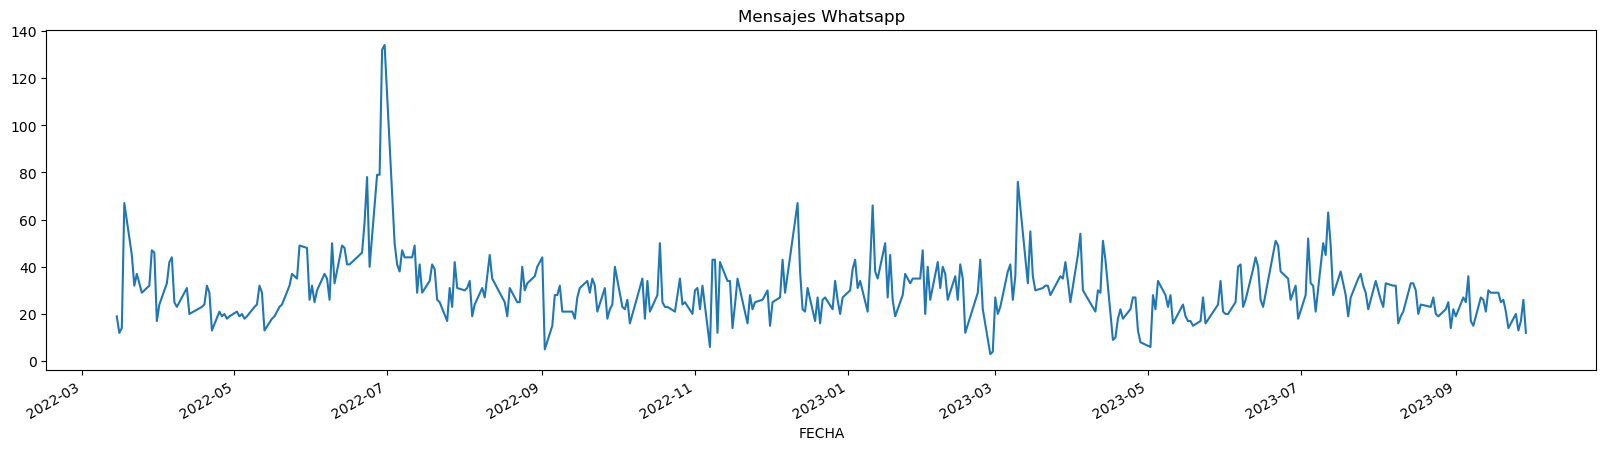

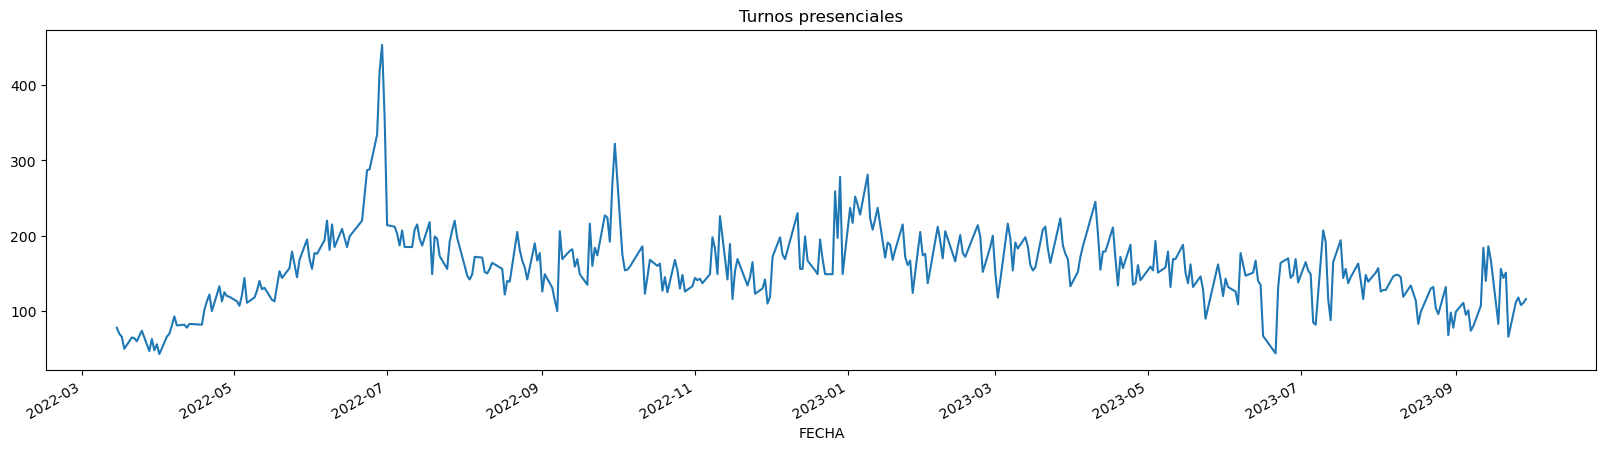

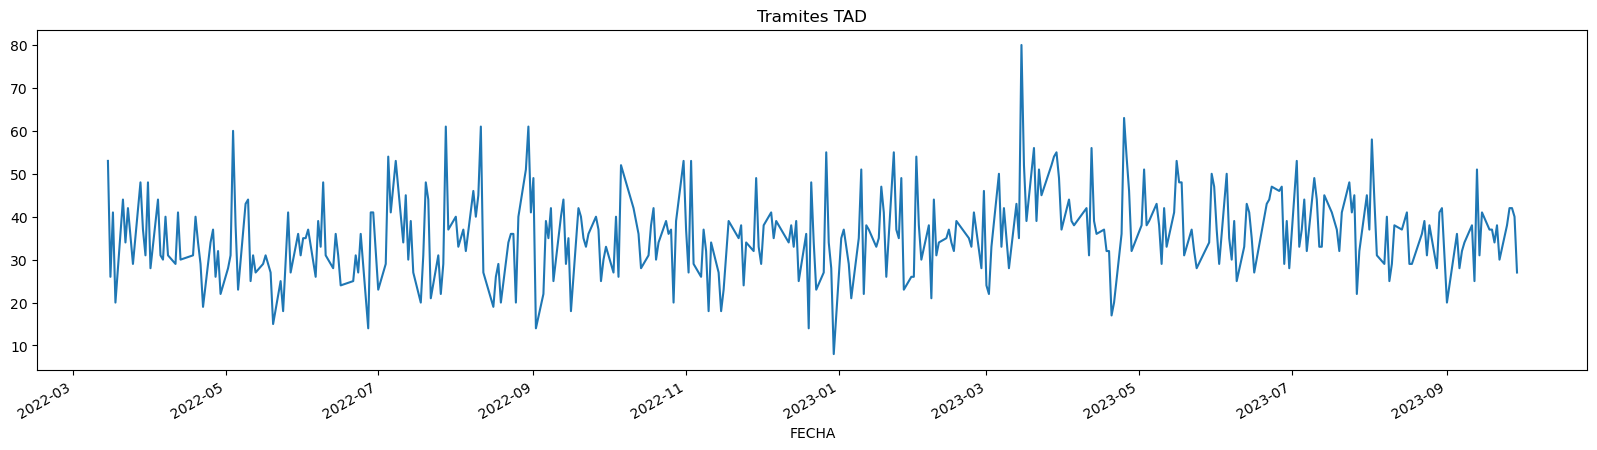

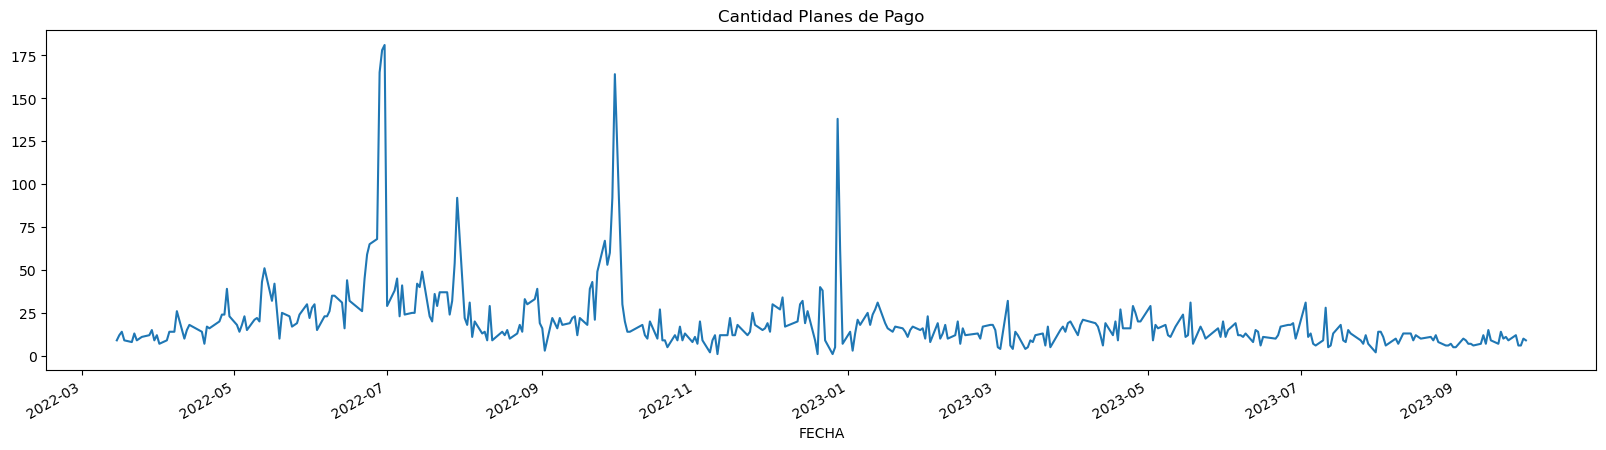

In [6]:
data.WAPP.plot(figsize=(20,5), title = "Mensajes Whatsapp")
plt.show()
data.TP.plot(figsize=(20,5), title = "Turnos presenciales")
plt.show()
data.TAD.plot(figsize=(20,5), title = "Tramites TAD")
plt.show()
data.PP.plot(figsize=(20,5), title = "Cantidad Planes de Pago")
plt.show()

---
### **Representación gráfica de la Función de Autocorrelación**

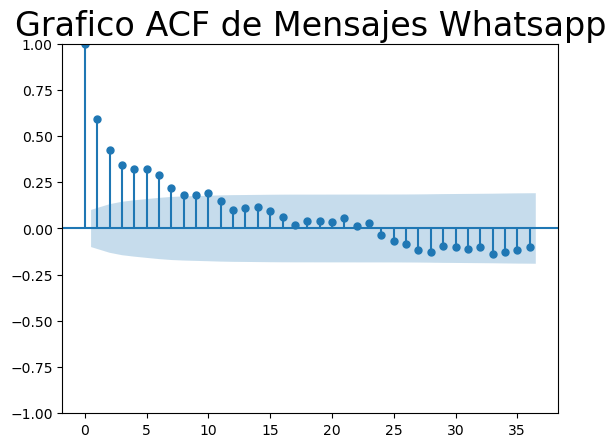

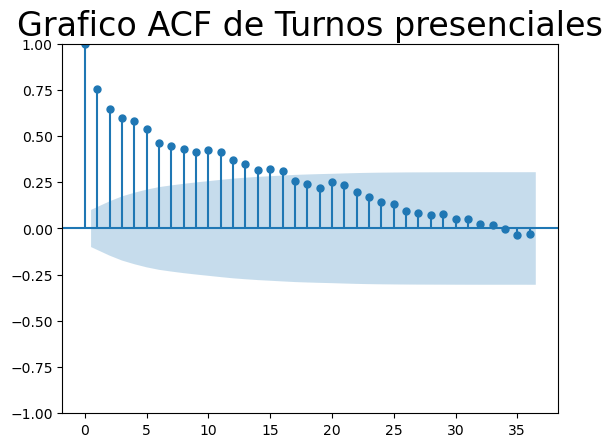

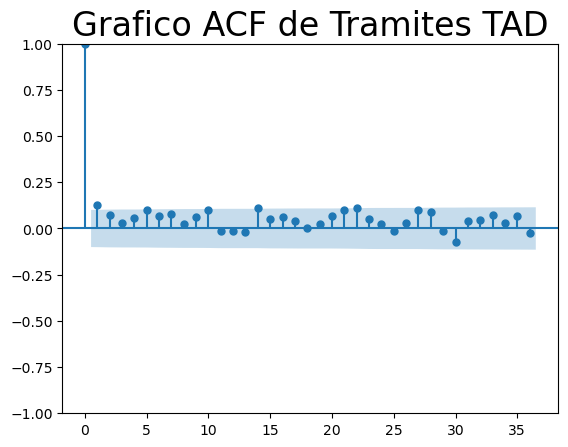

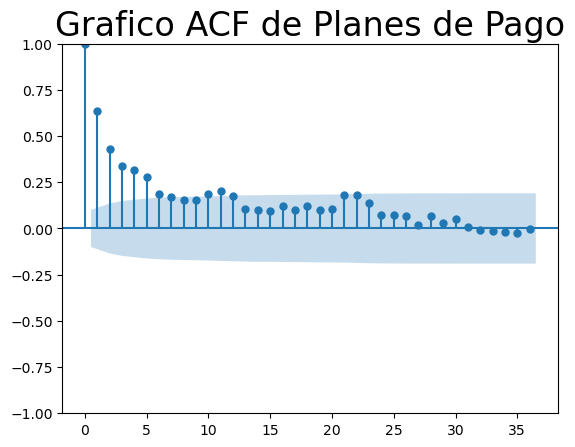

In [7]:
plot_acf(data.WAPP,lags=36)
plt.title("Grafico ACF de Mensajes Whatsapp", size= 24)
plt.show()
plot_acf(data.TP,lags=36)
plt.title("Grafico ACF de Turnos presenciales", size= 24)
plt.show()
plot_acf(data.TAD,lags=36)
plt.title("Grafico ACF de Tramites TAD", size= 24)
plt.show()
plot_acf(data.PP,lags=36)
plt.title("Grafico ACF de Planes de Pago", size= 24)
plt.show()

---
### **Representación gráfica de la Función de Autocorrelación Parcial**

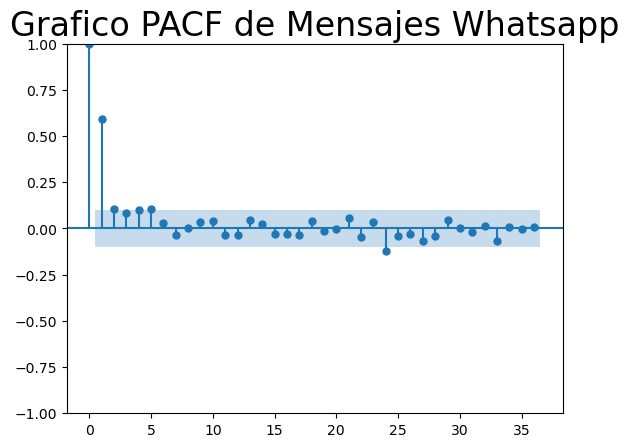

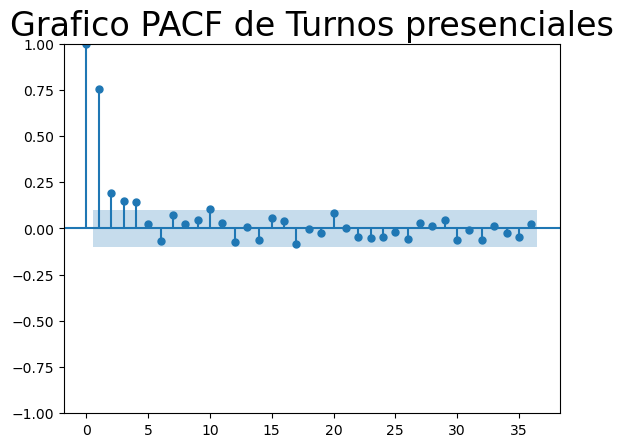

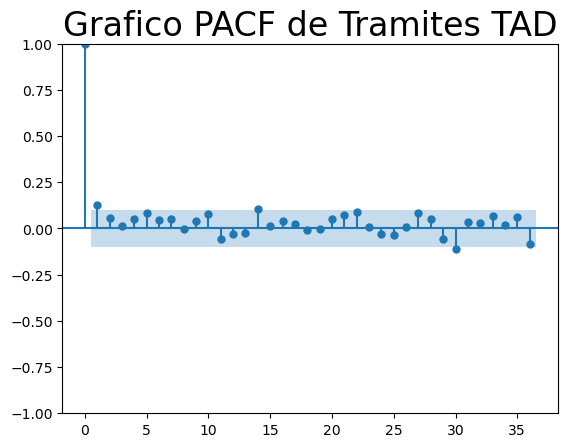

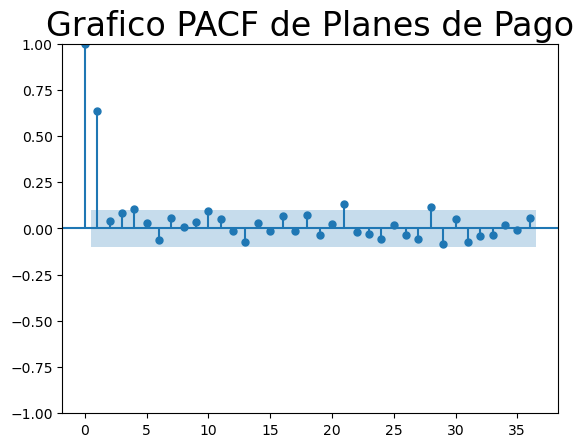

In [8]:
plot_pacf(data.WAPP,lags=36)
plt.title("Grafico PACF de Mensajes Whatsapp", size= 24)
plt.show()
plot_pacf(data.TP,lags=36)
plt.title("Grafico PACF de Turnos presenciales", size= 24)
plt.show()
plot_pacf(data.TAD,lags=36)
plt.title("Grafico PACF de Tramites TAD", size= 24)
plt.show()
plot_pacf(data.PP,lags=36)
plt.title("Grafico PACF de Planes de Pago", size= 24)
plt.show()

---
### **Descomposición aditiva**

Para visualizar y analizar las componentes de la serie de tiempo descompuesta, lo que puede ayudar a comprender la estructura de los datos y los patrones estacionales y de tendencia que pueden estar presentes. 

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

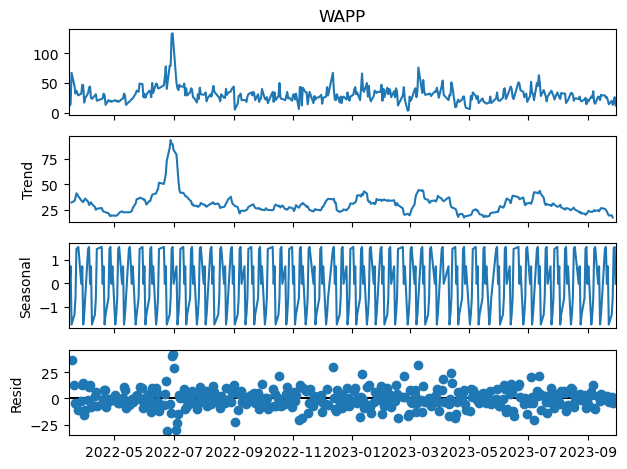

In [10]:
aditiveWP = seasonal_decompose(data.WAPP, model = "aditive", period=7)
aditiveWP.plot()
plt.show()

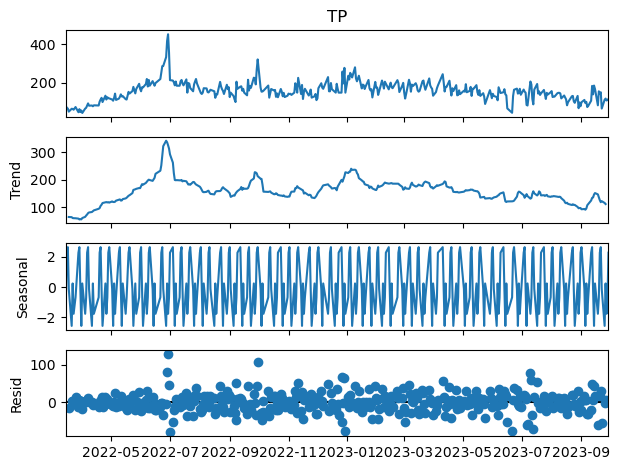

In [11]:
aditiveTP = seasonal_decompose(data.TP, model = "aditive", period=7)
aditiveTP.plot()
plt.show()

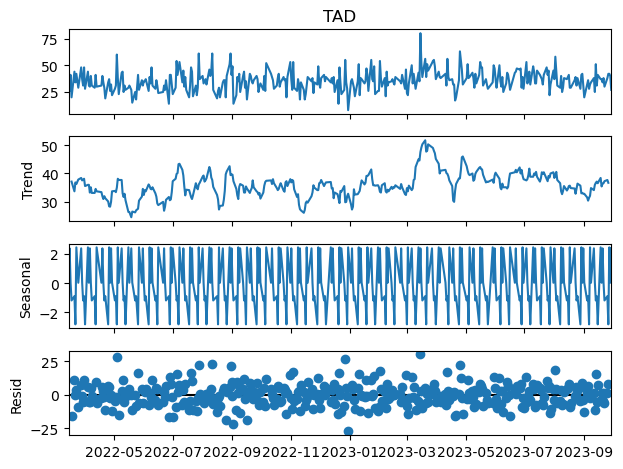

In [12]:
aditiveTAD = seasonal_decompose(data.TAD, model = "aditive", period=7)
aditiveTAD.plot()
plt.show()

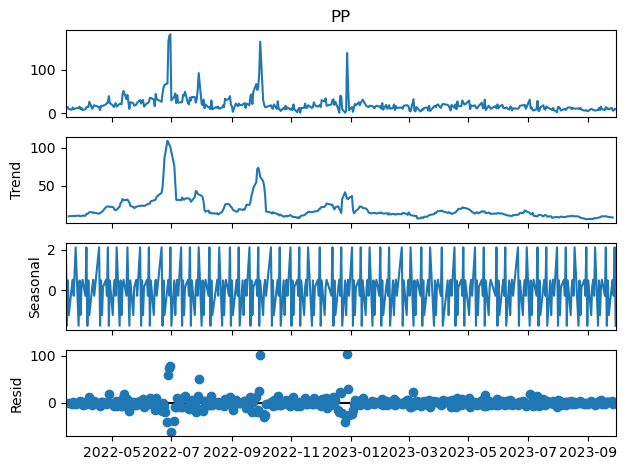

In [13]:
aditivePP = seasonal_decompose(data.PP, model = "aditive", period=7)
aditivePP.plot()
plt.show()

---
---
## **3. Graficar la FAS, FAC y FACP de las mismas en un solo gráfico y analizarlas. ¿Qué puede inferir de los gráficos?. Justificar con teoría.**

---
### **Representación gráfica de la Función de Autocorrelación**

In [14]:
## Función para dibujar juntos FAS: autocovarianzas; FAC (autocorrelacion ) y FACP (autocorrelación parcial)
def autocov_autocorr(serie_r,serie_nr, nrol= 75 ):
  p1, axes=plt.subplots(3,2, figsize=(18,10),sharex=True, sharey=False )
  axes[1,0].set_xlabel('Lag')

  plot_acf(serie_r, lags=nrol, ax= axes[0,1], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='MENSAJES DE WHATSAPP')
  plot_pacf(serie_r, lags=nrol, ax= axes[1,0], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,0].plot(tsa.acovf(serie_r,fft=False, nlag=nrol), color='r', label='AutoCov')
  
  p1.legend()
  plt.show()

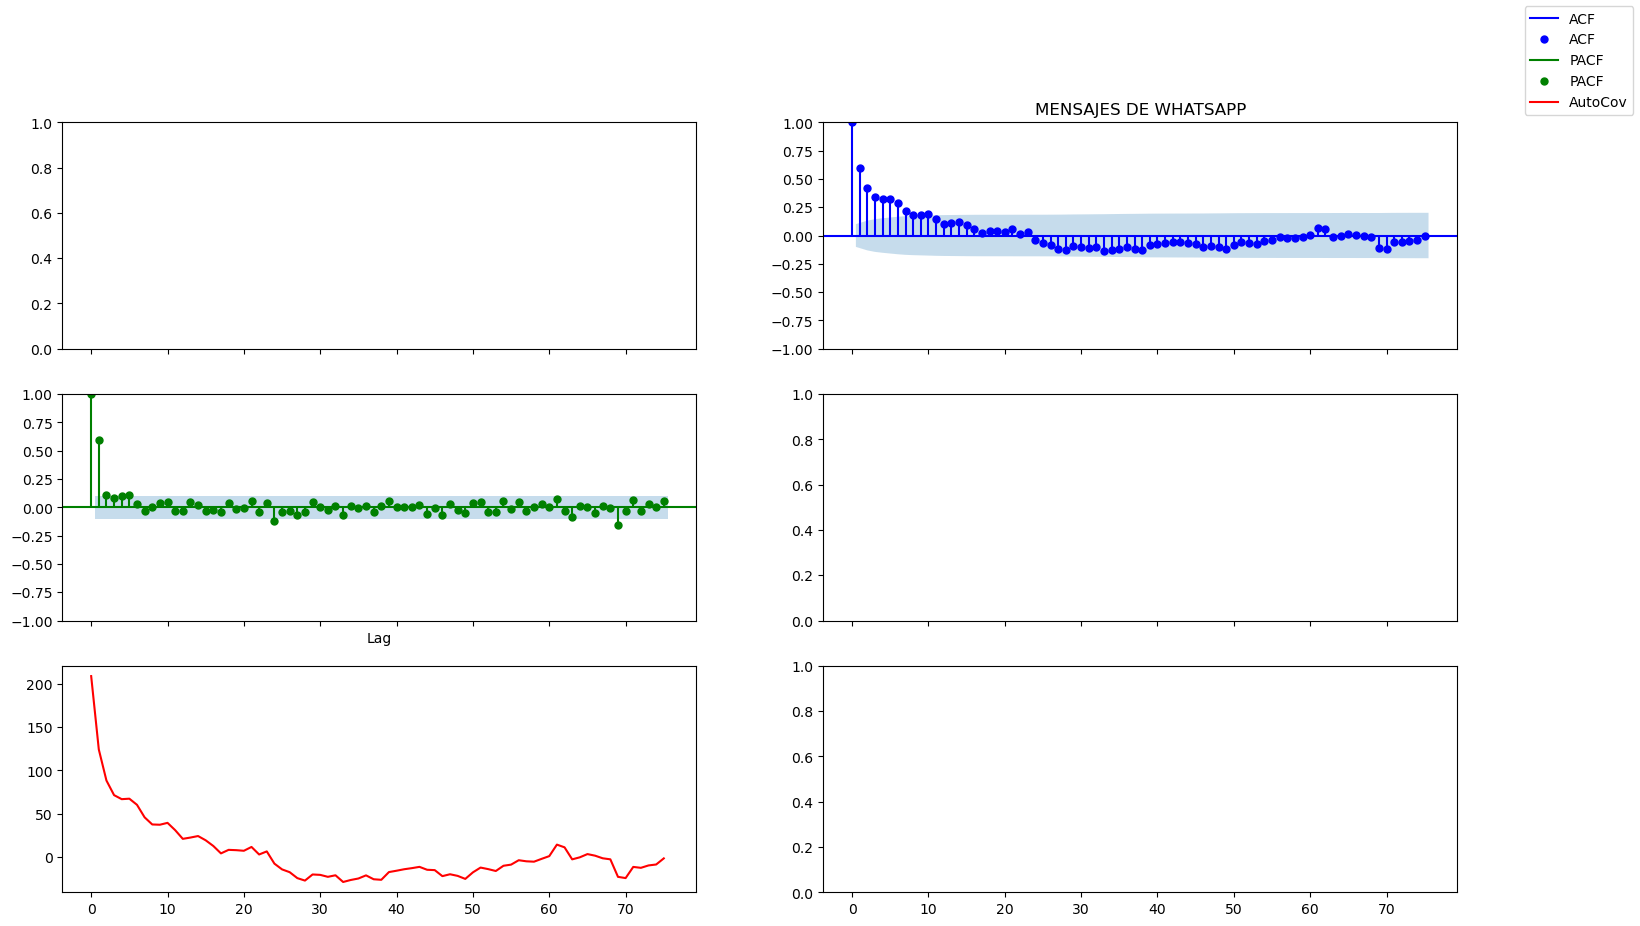

In [16]:
# Grafica diferentes funciones de la serie
autocov_autocorr(data.WAPP ,36)

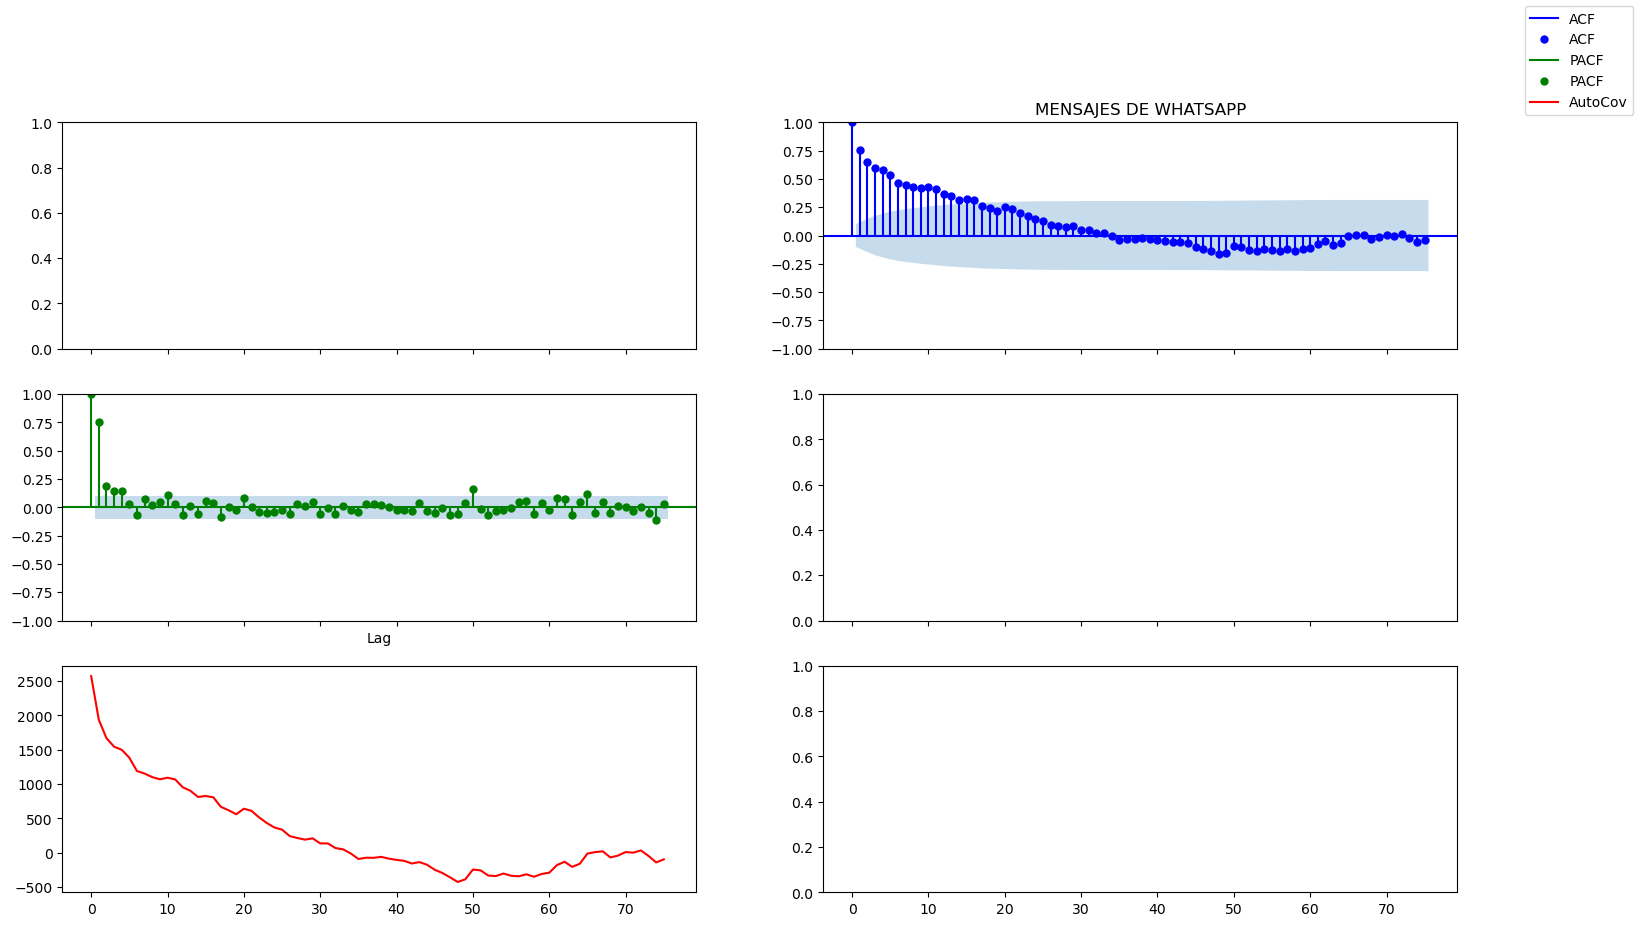

In [17]:
# Grafica diferentes funciones de la serie
autocov_autocorr(data.TP ,36)

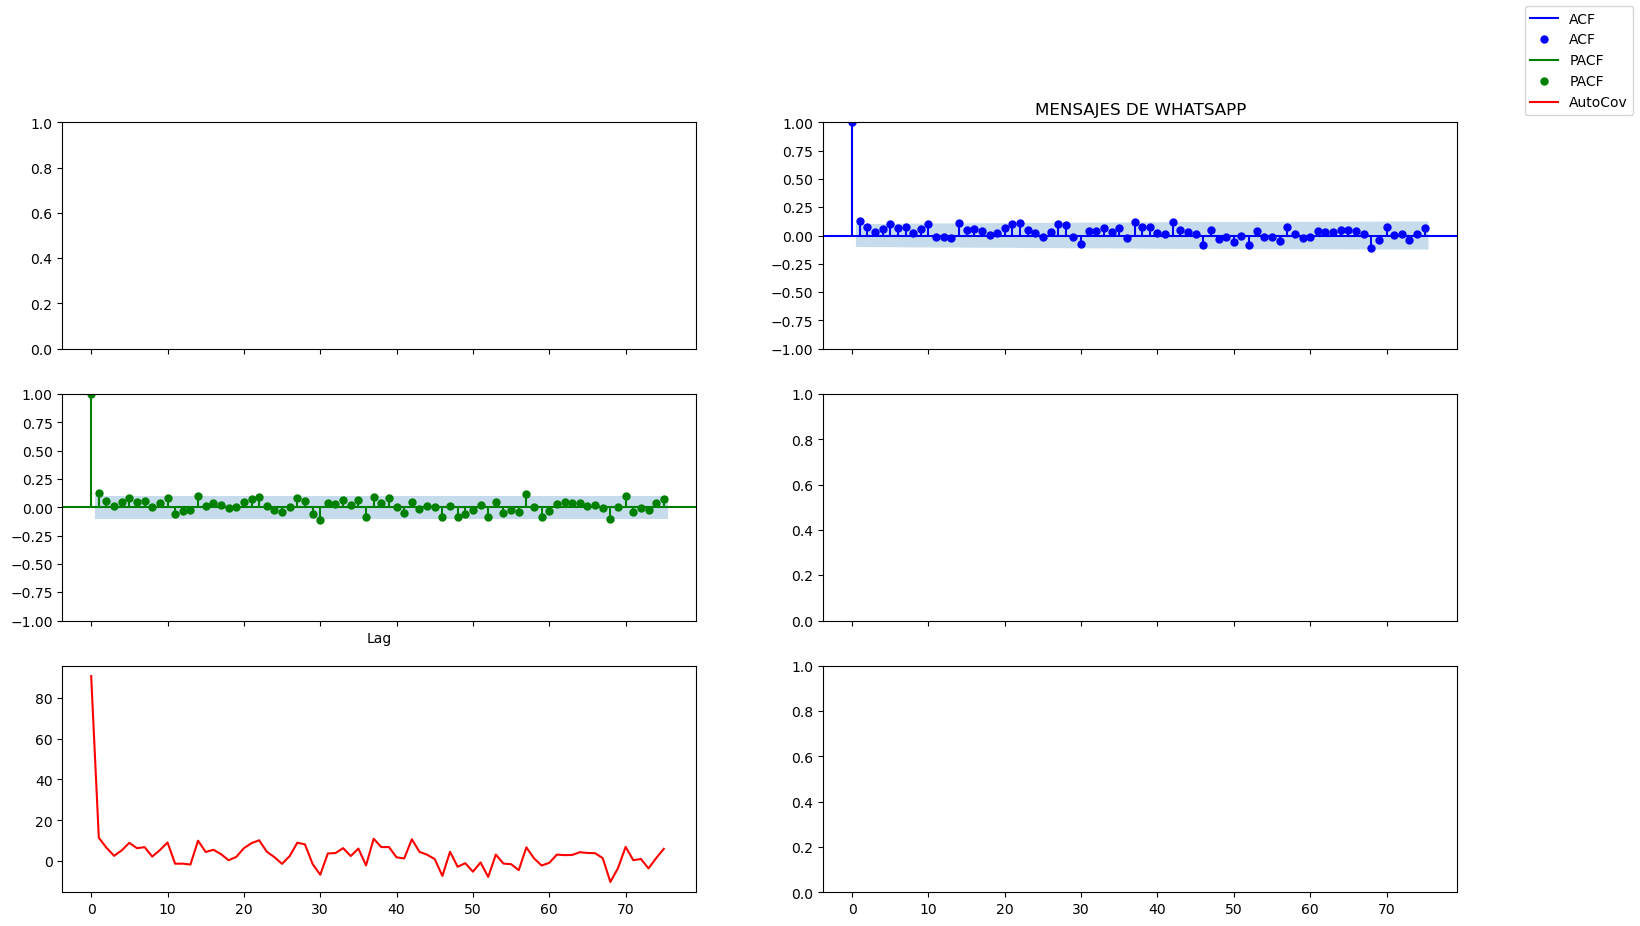

In [18]:
# Grafica diferentes funciones de la serie
autocov_autocorr(data.TAD ,36)

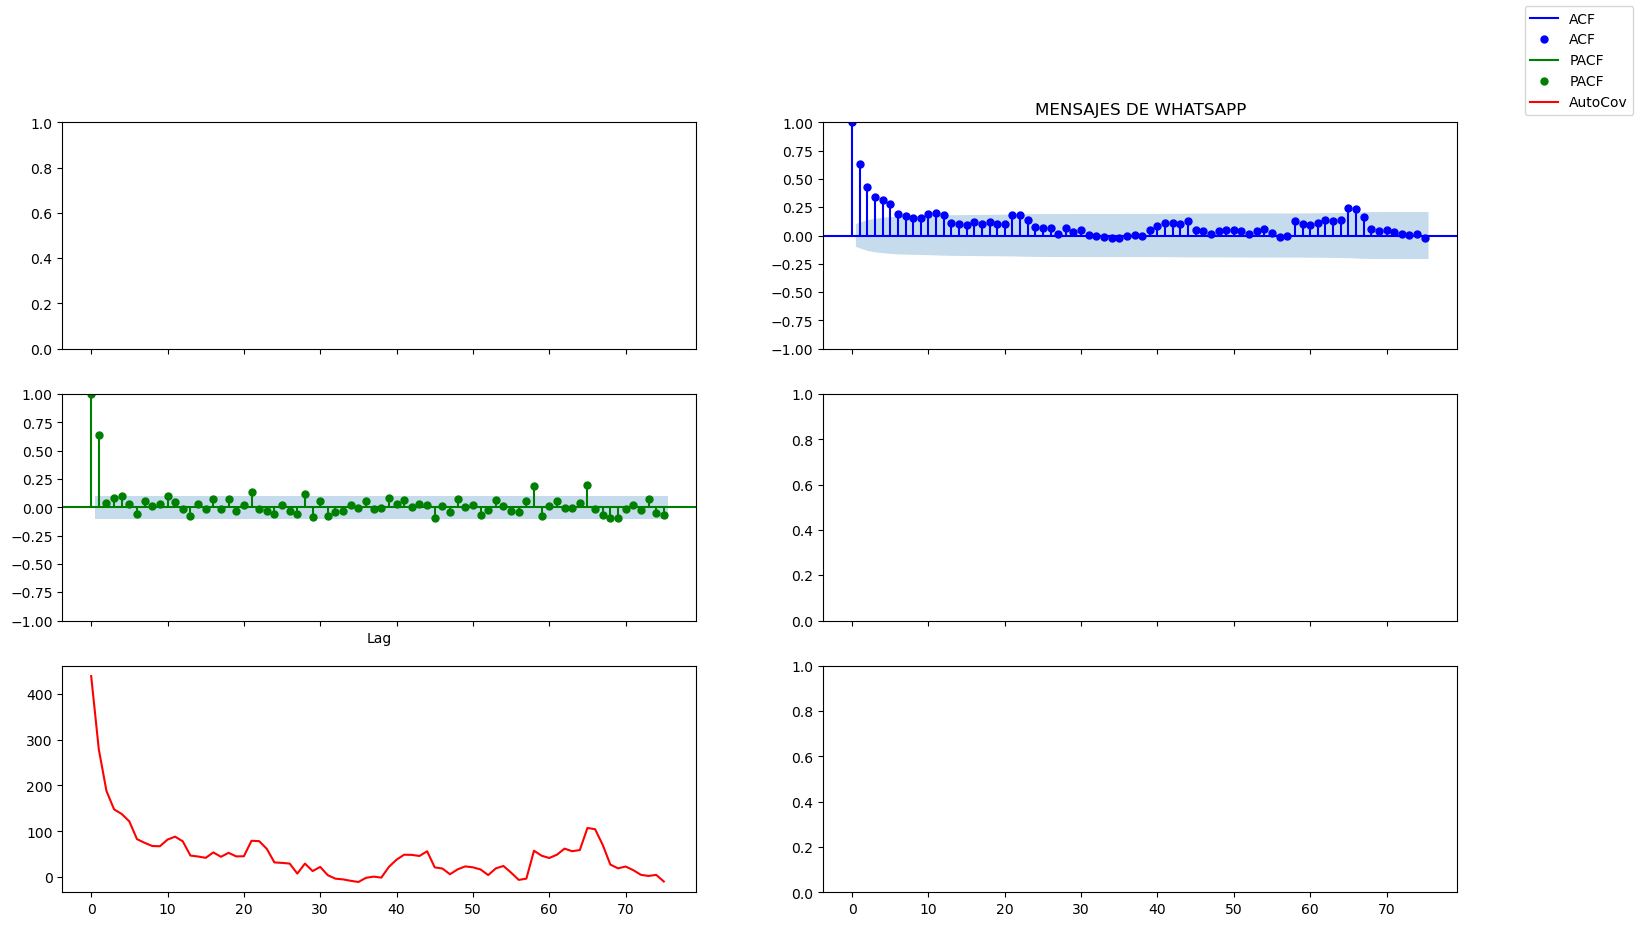

In [19]:
# Grafica diferentes funciones de la serie
autocov_autocorr(data.PP ,36)

---
---
## **4. Realizar distintas pruebas de raíces unitarias para determinar si las series elegidas son o no estacionarias**

--- 
### **TEST de Dickey Fuller y Dickey Fuller Aumentado**

In [20]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(data.WAPP, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-4.740535928304829,
 7.057244224841149e-05,
 4,
 375,
 {'1%': -3.447909006729481,
  '5%': -2.8692783343881483,
  '10%': -2.5708923751111112},
 2788.515168093619)

In [21]:
# Incluya ambos términos (“Trend”) - se denomina Ecuación de Dickey Fuller Aumentada
tsa.adfuller(data.WAPP, maxlag=None, regression='ct', autolag='AIC', store=False, regresults=False)

(-4.883945475189167,
 0.00033294838653415403,
 4,
 375,
 {'1%': -3.9831162986429627,
  '5%': -3.422262849758815,
  '10%': -3.1339732688355557},
 2788.8902354396946)

In [22]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(data.TP, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-4.0569299632346985,
 0.0011400602877526264,
 3,
 376,
 {'1%': -3.4478619826418817,
  '5%': -2.869257669826291,
  '10%': -2.570881358363513},
 3549.28833475007)

In [23]:
# Incluya ambos términos (“Trend”) - se denomina Ecuación de Dickey Fuller Aumentada
tsa.adfuller(data.TP, maxlag=None, regression='ct', autolag='AIC', store=False, regresults=False)

(-4.142434044999484,
 0.00546004289009478,
 3,
 376,
 {'1%': -3.983050998155364,
  '5%': -3.4222313639905777,
  '10%': -3.133954779603869},
 3547.5415867306374)

In [24]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(data.TAD, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-17.138514061512453,
 7.07088646670841e-30,
 0,
 379,
 {'1%': -3.4477224095888497,
  '5%': -2.869196333125208,
  '10%': -2.5708486586002604},
 2656.1151525883392)

In [25]:
# Incluya ambos términos (“Trend”) - se denomina Ecuación de Dickey Fuller Aumentada
tsa.adfuller(data.TAD, maxlag=None, regression='ct', autolag='AIC', store=False, regresults=False)

(-17.56046446442063,
 0.0,
 0,
 379,
 {'1%': -3.9828571817306773,
  '5%': -3.42213790916463,
  '10%': -3.1338998997509897},
 2649.3613062332806)

In [26]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(data.PP, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-5.7023596551260685,
 7.624245950438387e-07,
 3,
 376,
 {'1%': -3.4478619826418817,
  '5%': -2.869257669826291,
  '10%': -2.570881358363513},
 3061.049576137924)

In [27]:
# Incluya ambos términos (“Trend”) - se denomina Ecuación de Dickey Fuller Aumentada
tsa.adfuller(data.PP, maxlag=None, regression='ct', autolag='AIC', store=False, regresults=False)

(-9.751820207913626,
 7.841814374851366e-15,
 0,
 379,
 {'1%': -3.9828571817306773,
  '5%': -3.42213790916463,
  '10%': -3.1338998997509897},
 3051.496575862138)

**RESUMEN TEST DICKEY FULLER:**
Son todas series estacionarias

----
### **TEST KPSS** 

In [31]:
from statsmodels.tsa.stattools import kpss

In [32]:
def kpss_test(series, **kw):

    params = {'c':'Los datos son estacionarios alrededor de una constante.',
              'ct': 'Los datos son estacionarios alrededor de una tendencia.'
             }

    for param in params:
        print(f'Tipo de regresión: {param} - {params.get(param)}')

        statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
        # Format Output
        print(f'KPSS Estadistico: {statistic}')
        print(f'p-valor: {p_value}')
        print(f'numero de lags: {n_lags}')
        print('Valor critico:')
        for key, value in critical_values.items():
            print(f'   {key} : {value}')
        print(f'Resultado: La serie es {"no " if p_value < 0.05 else ""}estacionaria')
        print(f"KPSS Numero estimado de diferencias a aplicar: {ndiffs(series, test='kpss')}")

        print("*".center(60, '*'))
        print("")

In [33]:
kpss_test(data.WAPP) #data1.WAPP es la variable

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.2857467127776876
p-valor: 0.1
numero de lags: 10
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 0
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.06194459823169601
p-valor: 0.1
numero de lags: 9
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 0
************************************************************



In [34]:
kpss_test(data.TP)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.34283708625831805
p-valor: 0.1
numero de lags: 11
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.3016045427970026
p-valor: 0.01
numero de lags: 11
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************



In [35]:
kpss_test(data.TAD)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.9102855351700507
p-valor: 0.01
numero de lags: 5
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.13246296656194806
p-valor: 0.07506858044083692
numero de lags: 3
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************



In [36]:
kpss_test(data.PP)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.9943505796524705
p-valor: 0.01
numero de lags: 9
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.09069697916612782
p-valor: 0.1
numero de lags: 9
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************



---
### **TEST PHILLIP PERRON** para evaluar estacionariedad

In [37]:
from arch.unitroot import PhillipsPerron

In [38]:
def Phillips_Perron(series, **k):

    params = {'c':'Incluya término independiente pero no incluye término lineal',
              'ct':'Incluya ambos términos'
              }
    for param in params:
        print(f'Tipo de regresión: {param} - {params.get(param)}')
        pp = PhillipsPerron(series,trend=param, **k)
        print(f'PP Estadistico: {pp.stat}')
        print(f'p-valor: {pp.pvalue}')
        print(f'numero de lags: {pp.lags}')
        print('Valor Critico:')
        for key, value in pp.critical_values.items():
            print(f'   {key} : {value}')
        print(f'Resultado: La serie es {"no " if pp.pvalue > 0.05 else ""}estacionaria')
        print(f"PP Numero de diferenciacion estimada: {ndiffs(series, test='pp')}")

        print("*".center(60, '*'))
        print("")

In [39]:
Phillips_Perron(data.WAPP)

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -11.458632429535527
p-valor: 5.6254904173483205e-21
numero de lags: 17
Valor Critico:
   1% : -3.4477224095888497
   5% : -2.869196333125208
   10% : -2.5708486586002604
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -11.56216225318882
p-valor: 2.0951928951102932e-18
numero de lags: 17
Valor Critico:
   1% : -3.9828571817306773
   5% : -3.42213790916463
   10% : -3.1338998997509897
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************



Se valida con el test Phillip Perron que la serie WHATSAPP es estacionaria, y no hay que diferenciar

In [40]:
Phillips_Perron(data.TP)

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -8.459128653141804
p-valor: 1.584819356930798e-13
numero de lags: 17
Valor Critico:
   1% : -3.4477224095888497
   5% : -2.869196333125208
   10% : -2.5708486586002604
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -8.44402186725307
p-valor: 6.747770571477203e-12
numero de lags: 17
Valor Critico:
   1% : -3.9828571817306773
   5% : -3.42213790916463
   10% : -3.1338998997509897
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************



Segun el test Phillip Terron, la serie TURNOS PRESENCIALES es estacionaria y no hay que hacer una diferenciación

In [41]:
Phillips_Perron(data.TAD)

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -18.17045337464311
p-valor: 2.447811262062377e-30
numero de lags: 17
Valor Critico:
   1% : -3.4477224095888497
   5% : -2.869196333125208
   10% : -2.5708486586002604
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -17.98073467352686
p-valor: 0.0
numero de lags: 17
Valor Critico:
   1% : -3.9828571817306773
   5% : -3.42213790916463
   10% : -3.1338998997509897
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************



Segun el TEST Phillip Terron la serie TAD  es estacionaria y no hay que aplicar una diferenciación.


In [42]:
Phillips_Perron(data.PP)

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -10.264481589979667
p-valor: 4.153642772298283e-18
numero de lags: 17
Valor Critico:
   1% : -3.4477224095888497
   5% : -2.869196333125208
   10% : -2.5708486586002604
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -10.331323435070532
p-valor: 4.692785152690824e-16
numero de lags: 17
Valor Critico:
   1% : -3.9828571817306773
   5% : -3.42213790916463
   10% : -3.1338998997509897
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************



Segun el TEST Phillip Perron la serie PLAN DE PAGOS  es estacionaria y no hay que aplicar una diferenciación

**RESUMEN TEST PHILLIP PERRON:**
Todas las series son estacionarias según este test.

---
##### **CUADRO RESUMEN TESTS DE ESTACIONARIEDAD**



In [43]:
import pandas as pd
datatest = [
    ["Dickey Fuller", "si", "si", "si", "si"],
    ["Dickey Fuller Aumentado", "si", "si", "si", "si"],
    ["KPSS c", "si", "si", "no", "no"],
    ["KPSS t", "si", "no", "si", "si"],    
    ["Phillip Perron c", "si", "si", "si", "si"],
    ["Phillip Perron ct", "si", "si", "si", "si"]
]

# Encabezados de las columnas
headers = ["Test", "wapp", "tp", "tad", "pp"]

# Crear un DataFrame
df = pd.DataFrame(datatest, columns=headers)

# Mostrar el DataFrame
print(df)


                      Test wapp  tp tad  pp
0            Dickey Fuller   si  si  si  si
1  Dickey Fuller Aumentado   si  si  si  si
2                   KPSS c   si  si  no  no
3                   KPSS t   si  no  si  si
4         Phillip Perron c   si  si  si  si
5        Phillip Perron ct   si  si  si  si


Considerando el test de Dickey-Fuller, Dickey Fuller Aumentado, KPSS y Phillip Perron podemos determinar que las series son estacionarias.

---
### **HACER DIFERENCIACION**

In [44]:
data.head()

WAPP  TP  TAD  PP
FECHA                        
2022-03-15    19  78   53   9
2022-03-16    12  70   26  12
2022-03-17    14  66   41  14
2022-03-18    67  50   20   9
2022-03-21    45  65   44   8

In [45]:
# DIFERENCIACION DE LA VARIABLE WHATSAPP (WAPP)
data_diff_WAPP=data.WAPP.copy()
data_diff_WAPP=data_diff_WAPP.diff(periods = 1)
data_diff_WAPP.drop(['2022-03-15'], inplace=True)

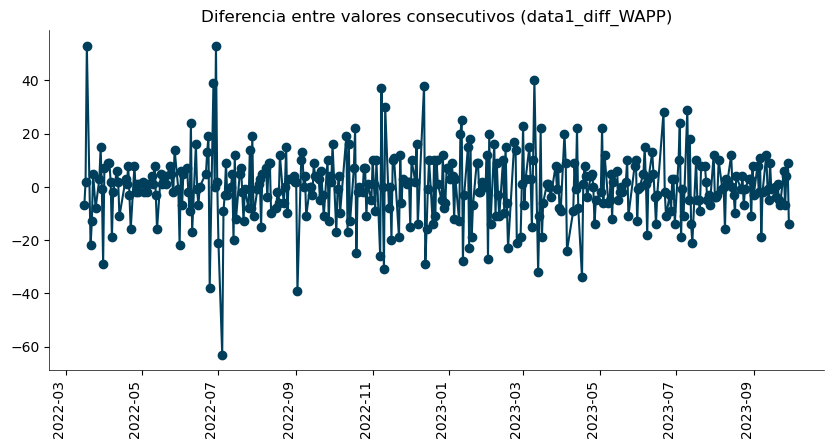

In [46]:
# Traza la Serie data1_diff_WAPP
data_diff_WAPP.plot(figsize=(10, 5), marker='o', linestyle='-', color='#003f5c')
# Etiquetas y título del gráfico
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.title('Diferencia entre valores consecutivos (data1_diff_WAPP)')
# Muestra el gráfico
plt.show()

In [47]:
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(data_diff_WAPP, maxlag=None, regression='n', autolag='AIC', store=False, regresults=False)

(-12.916732705106464,
 1.5071171349421608e-23,
 4,
 374,
 {'1%': -2.5717440049758356,
  '5%': -1.9417416419975033,
  '10%': -1.616128757626885},
 2798.8729176696143)

In [48]:
# DIFERENCIACION DE LA VARIABLE TURNOS PRESENCIALES (TP)
data_diff_TP=data.TP.copy()
data_diff_TP=data_diff_TP.diff(periods = 1)
data_diff_TP.drop(['2022-03-15'], inplace=True)

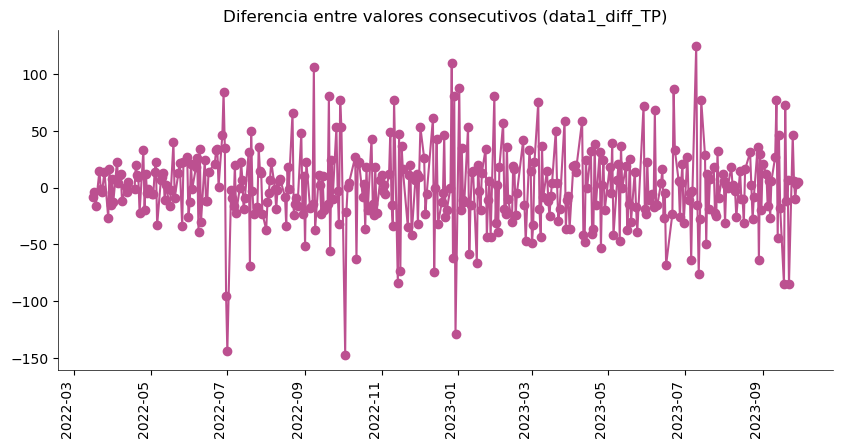

In [49]:
# Traza la Serie data1_diff_TP
data_diff_TP.plot(figsize=(10, 5), marker='o', linestyle='-', color='#bc5090')
# Etiquetas y título del gráfico
plt.xlabel('')  # Establecer el título del eje x como una cadena vacía
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.title('Diferencia entre valores consecutivos (data1_diff_TP)')
# Muestra el gráfico
plt.show()


In [50]:
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(data_diff_TP, maxlag=None, regression='n', autolag='AIC', store=False, regresults=False)

(-9.73639427574136,
 3.817258854824125e-17,
 8,
 370,
 {'1%': -2.571809196493791,
  '5%': -1.9417499095216473,
  '10%': -1.6161214861113853},
 3548.505644951998)

In [51]:
# DIFERENCIACION DE LA VARIABLE TRÁMITES (TAD)
data_diff_TAD=data.TAD.copy()
data_diff_TAD=data_diff_TAD.diff(periods = 1)
data_diff_TAD.drop(['2022-03-15'], inplace=True)

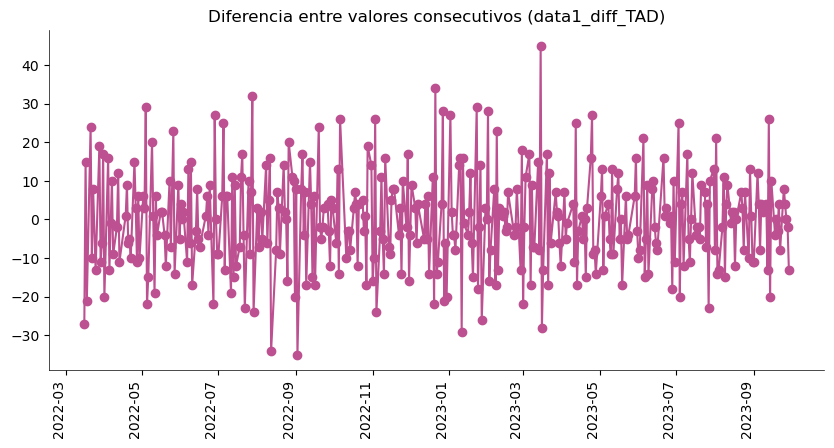

In [52]:
# Traza la Serie data1_diff_TAD
data_diff_TAD.plot(figsize=(10, 5), marker='o', linestyle='-', color='#bc5090')
# Etiquetas y título del gráfico
plt.xlabel('')  # Establecer el título del eje x como una cadena vacía
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.title('Diferencia entre valores consecutivos (data1_diff_TAD)')
# Muestra el gráfico
plt.show()

In [53]:
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(data_diff_TAD, maxlag=None, regression='n', autolag='AIC', store=False, regresults=False)

(-8.801149383373286,
 4.873461286769415e-15,
 12,
 366,
 {'1%': -2.5718758192242226,
  '5%': -1.9417583631286157,
  '10%': -1.616114059985768},
 2670.1647448552244)

In [54]:
# DIFERENCIACION DE LA VARIABLE PLANES DE PAGO (PP)
data_diff_PP=data.PP.copy()
data_diff_PP=data_diff_PP.diff(periods = 1)
data_diff_PP.drop(['2022-03-15'], inplace=True)

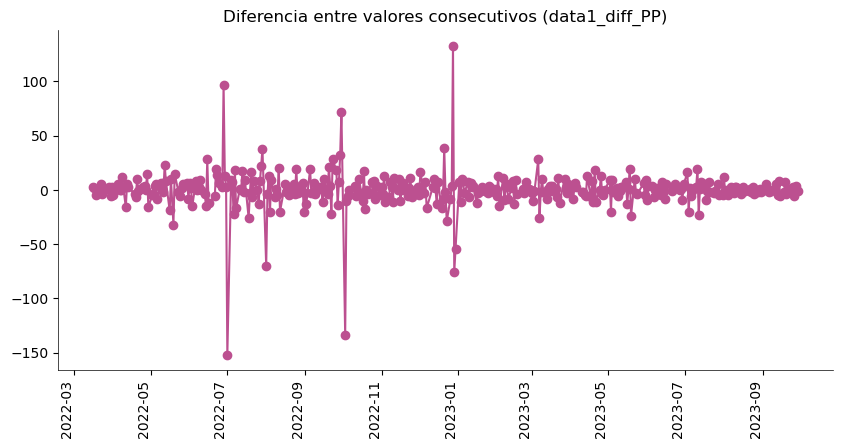

In [55]:
# Traza la Serie data1_diff_PP
data_diff_PP.plot(figsize=(10, 5), marker='o', linestyle='-', color='#bc5090')
# Etiquetas y título del gráfico
plt.xlabel('')  # Establecer el título del eje x como una cadena vacía
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.title('Diferencia entre valores consecutivos (data1_diff_PP)')
# Muestra el gráfico
plt.show()

In [56]:
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(data_diff_PP, maxlag=None, regression='n', autolag='AIC', store=False, regresults=False)

(-9.73092962734764,
 3.92546247502348e-17,
 9,
 369,
 {'1%': -2.5718257161742346,
  '5%': -1.9417520052351545,
  '10%': -1.6161196442657781},
 3067.982374319884)

---
---
## **5. Efectuar una estimación de la serie temporal con distintos órdenes de parámetros de modelos SARIMA y encontrar aquel que se ajuste mejor a los datos (pueden emplear Criterios de Información/Selección y analizar significatividad individual y global de los parámetros del modelo).**

**DIFF WAPP**

In [57]:
auto_arima(data_diff_WAPP, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=3022.553, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2992.947, Time=0.11 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2962.685, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=3020.554, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=2961.927, Time=0.06 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=2962.584, Time=0.11 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=2964.477, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=2940.636, Time=0.08 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=2942.310, Time=0.19 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=2942.326, Time=0.21 sec
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=2944.284, Time=0.35 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=2991.729, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=2942.619, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=2942.618, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  379
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1466.338
Date:                Sat, 11 Nov 2023   AIC                           2938.676
Time:                        19:00:19   BIC                           2950.488
Sample:                             0   HQIC                          2943.364
                                - 379                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4094      0.052      7.935      0.000       0.308       0.510
ma.L1         -0.8714      0.023    -38.094      0.000      -0.916      -0.827
sigma2       134.0392      5.538     24.205      0.000     123.185     144.893
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               391.26
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             0.92
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
modelo_sarima_WAPP = SARIMAX(data_diff_WAPP, order=(1,0,1), seasonal_order=(0,0,0,7))
modelo_sarima_WAPP = modelo_sarima_WAPP.fit()
print(modelo_sarima_WAPP.summary())

                               SARIMAX Results                                
Dep. Variable:                   WAPP   No. Observations:                  379
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1466.338
Date:                Sat, 11 Nov 2023   AIC                           2938.676
Time:                        19:00:45   BIC                           2950.488
Sample:                             0   HQIC                          2943.364
                                - 379                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4094      0.052      7.935      0.000       0.308       0.510
ma.L1         -0.8714      0.023    -38.094      0.000      -0.916      -0.827
sigma2       134.0392      5.538     24.205      0.0

**DIFF TP**

In [59]:
auto_arima(data_diff_TP, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=3783.506, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=3752.239, Time=0.12 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=3723.049, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=3781.509, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=3723.451, Time=0.07 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,1)(0,0,2)[7] intercept   : AIC=3723.487, Time=0.31 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=3723.394, Time=0.16 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=3724.293, Time=0.41 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=3785.424, Time=0.04 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=3711.955, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=3710.268, Time=0.10 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=3712.011, Time=0.22 sec
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=3

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  379
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1851.171
Date:                Sat, 11 Nov 2023   AIC                           3708.342
Time:                        19:01:26   BIC                           3720.154
Sample:                             0   HQIC                          3713.030
                                - 379                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3774      0.056      6.728      0.000       0.267       0.487
ma.L1         -0.8179      0.030    -27.593      0.000      -0.876      -0.760
sigma2      1021.9381     54.378     18.793      0.000     915.359    1128.517
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                61.87
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.38
Prob(H) (two-sided):                  0.76   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
modelo_sarima_TP = SARIMAX(data_diff_TP, order=(2,0,2), seasonal_order=(0,0,0,7))
modelo_sarima_TP = modelo_sarima_TP.fit()
print(modelo_sarima_TP.summary())

                               SARIMAX Results                                
Dep. Variable:                     TP   No. Observations:                  379
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1851.144
Date:                Sat, 11 Nov 2023   AIC                           3712.287
Time:                        19:01:33   BIC                           3731.975
Sample:                             0   HQIC                          3720.100
                                - 379                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0186      3.320     -0.006      0.996      -6.526       6.489
ar.L2          0.1659      1.235      0.134      0.893      -2.255       2.587
ma.L1         -0.4250      3.327     -0.128      0.8

**DIFF TAD**

In [61]:
auto_arima(data_diff_TAD, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2997.127, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2908.685, Time=0.14 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2785.271, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2995.138, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=2783.401, Time=0.05 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=2785.254, Time=0.16 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=2783.765, Time=0.33 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=2783.426, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=2783.506, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=2906.721, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=2785.378, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[7]             : AIC=2781.427, Time=0.03 sec
 ARIMA(0,0,1)(1,0,0)[7]             : AIC=2783.285, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[7]             : AIC=2783.302, Time=0.07 sec
 ARIMA(0,0,1)(1,0,1)[7]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  379
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1388.714
Date:                Sat, 11 Nov 2023   AIC                           2781.427
Time:                        19:01:38   BIC                           2789.302
Sample:                             0   HQIC                          2784.552
                                - 379                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9559      0.016    -59.466      0.000      -0.987      -0.924
sigma2        88.5845      5.034     17.599      0.000      78.719      98.450
===================================================================================
Ljung-Box (L1) (Q):                   2.02   Jarque-Bera (JB):                41.93
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.50
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
modelo_sarima_TAD = SARIMAX(data_diff_TAD, order=(0,0,1), seasonal_order=(0,0,0,7))
modelo_sarima_TAD = modelo_sarima_TAD.fit()
print(modelo_sarima_TAD.summary())

                               SARIMAX Results                                
Dep. Variable:                    TAD   No. Observations:                  379
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1388.714
Date:                Sat, 11 Nov 2023   AIC                           2781.427
Time:                        19:01:49   BIC                           2789.302
Sample:                             0   HQIC                          2784.552
                                - 379                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9559      0.016    -59.466      0.000      -0.987      -0.924
sigma2        88.5845      5.034     17.599      0.000      78.719      98.450
Ljung-Box (L1) (Q):                   2.02   Jarque-

**DIFF PP**

In [63]:
auto_arima(data_diff_PP, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=3265.837, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=3251.428, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=3232.818, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=3263.837, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=3232.725, Time=0.04 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=3232.975, Time=0.11 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=3234.757, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=3205.548, Time=0.07 sec
 ARIMA(0,0,2)(1,0,0)[7] intercept   : AIC=3205.973, Time=0.14 sec
 ARIMA(0,0,2)(0,0,1)[7] intercept   : AIC=3205.912, Time=0.22 sec
 ARIMA(0,0,2)(1,0,1)[7] intercept   : AIC=3207.907, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,3)(0,0,0)[7] intercept   : AIC=3197.327, Time=0.12 sec
 ARIMA(0,0,3)(1,0,0)[7] intercept   : AIC=3

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  379
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1591.707
Date:                Sat, 11 Nov 2023   AIC                           3189.414
Time:                        19:02:00   BIC                           3201.227
Sample:                             0   HQIC                          3194.102
                                - 379                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5687      0.031     18.364      0.000       0.508       0.629
ma.L1         -0.9659      0.016    -59.907      0.000      -0.998      -0.934
sigma2       259.2176      5.251     49.365      0.000     248.926     269.509
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9745.29
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                             2.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
modelo_sarima_PP = SARIMAX(data_diff_PP, order=(1,0,1), seasonal_order=(0,0,0,7))
modelo_sarima_PP = modelo_sarima_PP.fit()
print(modelo_sarima_PP.summary())

                               SARIMAX Results                                
Dep. Variable:                     PP   No. Observations:                  379
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1591.707
Date:                Sat, 11 Nov 2023   AIC                           3189.414
Time:                        19:02:15   BIC                           3201.227
Sample:                             0   HQIC                          3194.102
                                - 379                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5687      0.031     18.364      0.000       0.508       0.629
ma.L1         -0.9659      0.016    -59.907      0.000      -0.998      -0.934
sigma2       259.2176      5.251     49.365      0.0

**WHATSAPP (WAPP)**

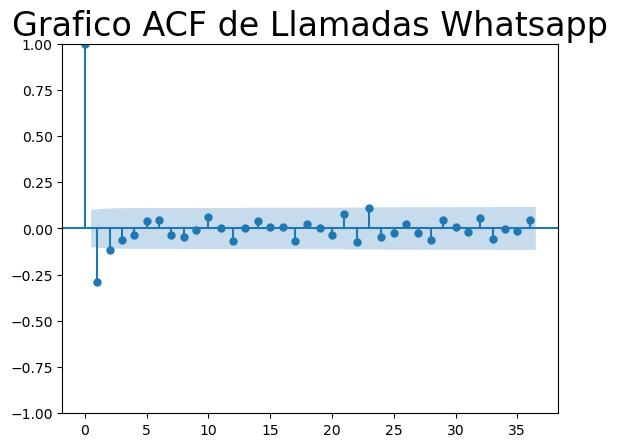

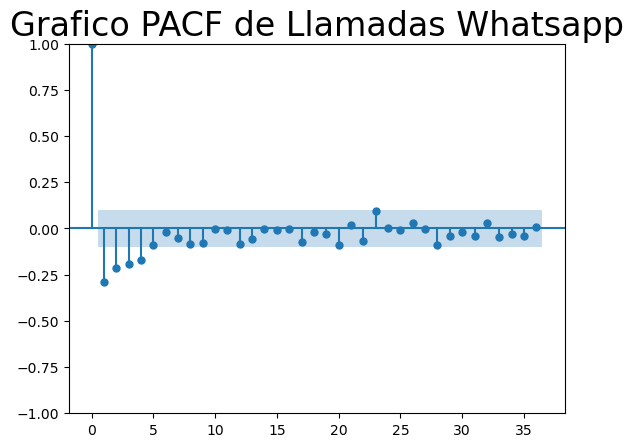

In [65]:
plot_acf(data_diff_WAPP,lags=36)
plt.title("Grafico ACF de Llamadas Whatsapp", size= 24)
plt.show()
plot_pacf(data_diff_WAPP,lags=36)
plt.title("Grafico PACF de Llamadas Whatsapp", size= 24)
plt.show()

**TURNOS PRESENCIALES (TP)**

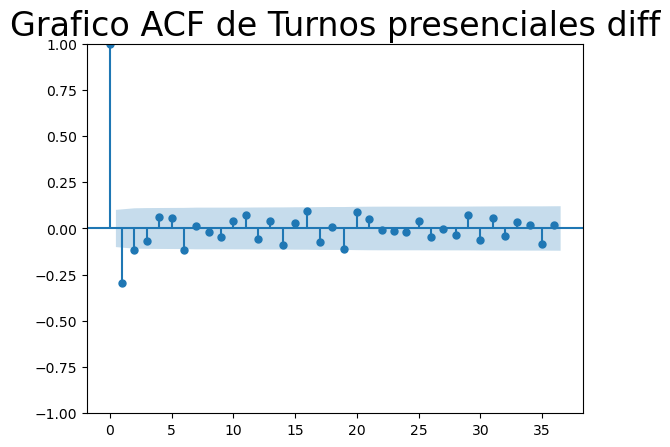

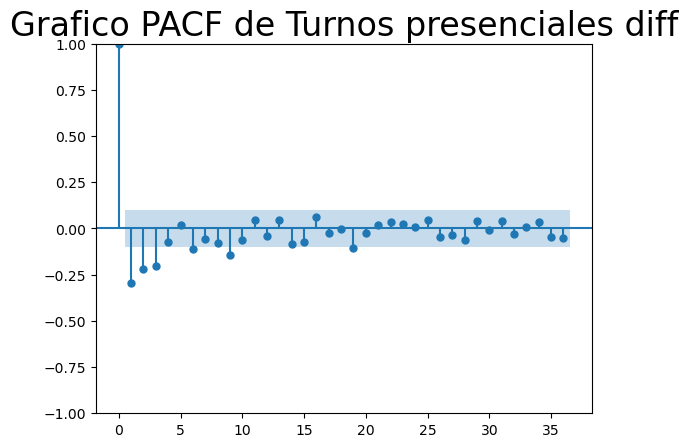

In [66]:
plot_acf(data_diff_TP,lags=36)
plt.title("Grafico ACF de Turnos presenciales diff", size= 24)
plt.show()
plot_pacf(data_diff_TP,lags=36)
plt.title("Grafico PACF de Turnos presenciales diff", size= 24)
plt.show()

**TRAMITES A DISTANCIA (TAD)**

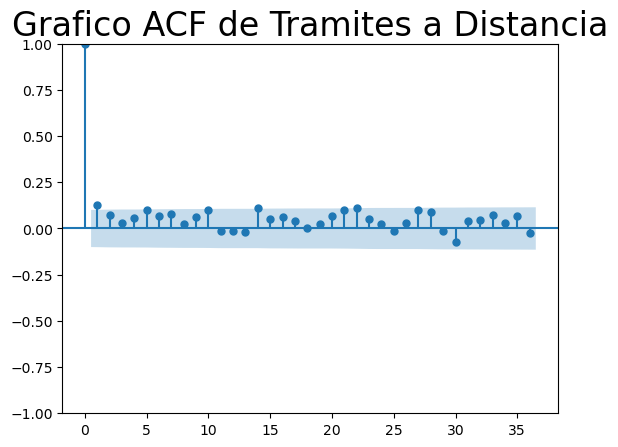

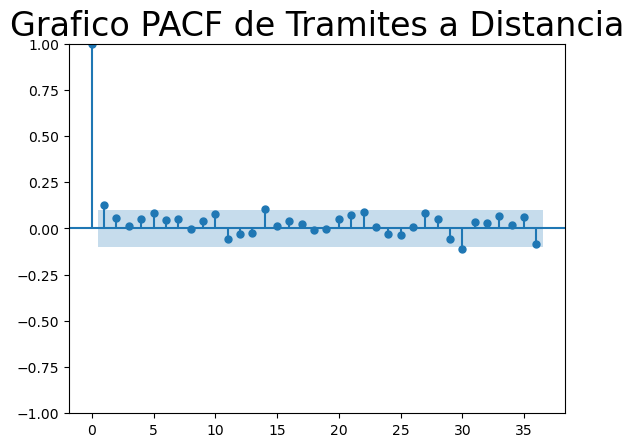

In [67]:
plot_acf(data.TAD,lags=36)
plt.title("Grafico ACF de Tramites a Distancia", size= 24)
plt.show()
plot_pacf(data.TAD,lags=36)
plt.title("Grafico PACF de Tramites a Distancia", size= 24)
plt.show()

**PLAN DE PAGOS (PP)**

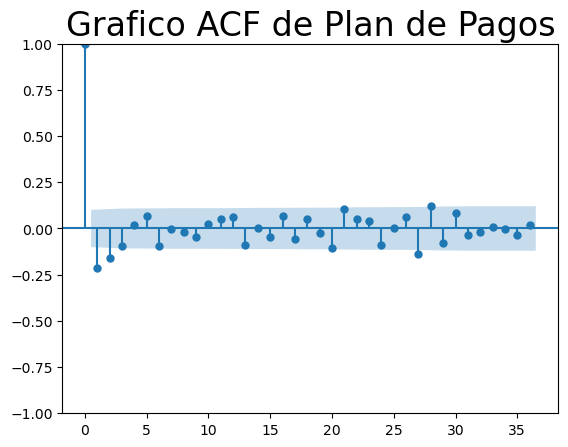

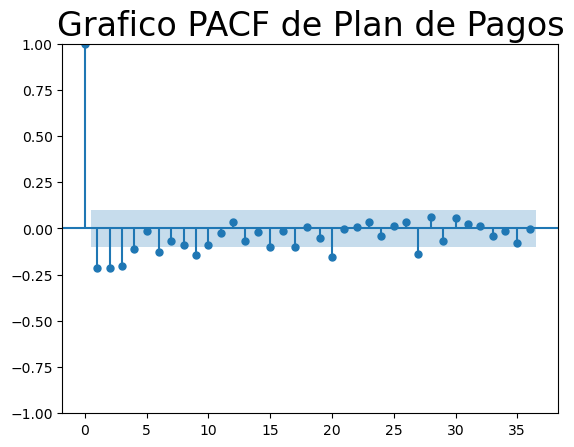

In [68]:
plot_acf(data_diff_PP,lags=36)
plt.title("Grafico ACF de Plan de Pagos", size= 24)
plt.show()
plot_pacf(data_diff_PP,lags=36)
plt.title("Grafico PACF de Plan de Pagos", size= 24)
plt.show()

---
## **6. Evaluar alguna métrica de performance teniendo en cuenta el entrenamiento del modelo entre Training Set y Testing Set.**

**WHATSAPP**

In [69]:
# Seleccionamos el primer 75% para train
train_WAPP = data_diff_WAPP.iloc[:round(len(data_diff_WAPP)*.75)]
# Seleccionamos el 25% restante para test
test_WAPP = data_diff_WAPP.iloc[round(len(data_diff_WAPP)*.75):]
# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_WAPP, test_WAPP)

FECHA
2022-03-16    -7.0
2022-03-17     2.0
2022-03-18    53.0
2022-03-21   -22.0
2022-03-22   -13.0
              ... 
2023-05-08    -6.0
2023-05-09    -5.0
2023-05-10     5.0
2023-05-11   -12.0
2023-05-12     2.0
Name: WAPP, Length: 284, dtype: float64 FECHA
2023-05-15     6.0
2023-05-16    -5.0
2023-05-17    -2.0
2023-05-18     0.0
2023-05-19    -2.0
              ... 
2023-09-25     6.0
2023-09-26    -7.0
2023-09-27     4.0
2023-09-28     9.0
2023-09-29   -14.0
Name: WAPP, Length: 95, dtype: float64


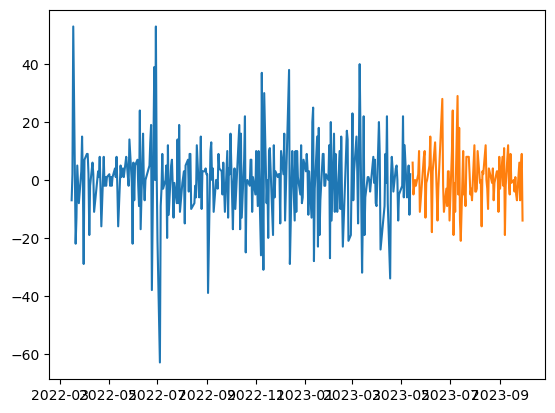

In [70]:
plt.plot(train_WAPP)
plt.plot(test_WAPP)

In [71]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA
auto_arima(train_WAPP, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2306.528, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2284.329, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2264.579, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2304.528, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=2262.730, Time=0.05 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=2264.579, Time=0.10 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=2266.579, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=2248.614, Time=0.07 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=2250.604, Time=0.13 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=2250.604, Time=0.14 sec
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=2251.942, Time=0.38 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=2282.329, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=2250.220, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  284
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1118.085
Date:                Sat, 11 Nov 2023   AIC                           2248.171
Time:                        19:03:35   BIC                           2270.065
Sample:                             0   HQIC                          2256.948
                                - 284                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0010      0.005     -0.199      0.842      -0.011       0.009
ar.L1          1.2870      0.218      5.896      0.000       0.859       1.715
ar.L2         -0.3324      0.134     -2.488      0.013      -0.594      -0.071
ma.L1         -1.7617      0.217     -8.111      0.000      -2.187      -1.336
ma.L2          0.7656      0.203      3.780      0.000       0.369       1.162
sigma2       152.9426      8.323     18.377      0.000     136.631     169.254
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               291.88
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                             0.97
Prob(H) (two-sided):                  0.03   Kurtosis:                         7.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
modelo_sarima_WAPP = SARIMAX(train_WAPP, order=(2,0,2), seasonal_order=(0,0,0,7))
result_sarima_WAPP = modelo_sarima_WAPP.fit()
print(result_sarima_WAPP.summary())

                               SARIMAX Results                                
Dep. Variable:                   WAPP   No. Observations:                  284
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1117.160
Date:                Sat, 11 Nov 2023   AIC                           2244.320
Time:                        19:03:45   BIC                           2262.565
Sample:                             0   HQIC                          2251.635
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2315      0.219      5.630      0.000       0.803       1.660
ar.L2         -0.2963      0.145     -2.050      0.040      -0.580      -0.013
ma.L1         -1.7256      1.798     -0.960      0.3

In [73]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))

In [74]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_WAPP = result_sarima_WAPP.get_forecast(len(test_WAPP))

In [75]:
predicciones_WAPP = result_sarima_WAPP.get_forecast(95)

In [76]:
WAPP_pred = predicciones_sarima_WAPP.predicted_mean
WAPP_int = predicciones_sarima_WAPP.conf_int()

In [77]:
WAPP_pred.index = test_WAPP.index
WAPP_int.index = test_WAPP.index

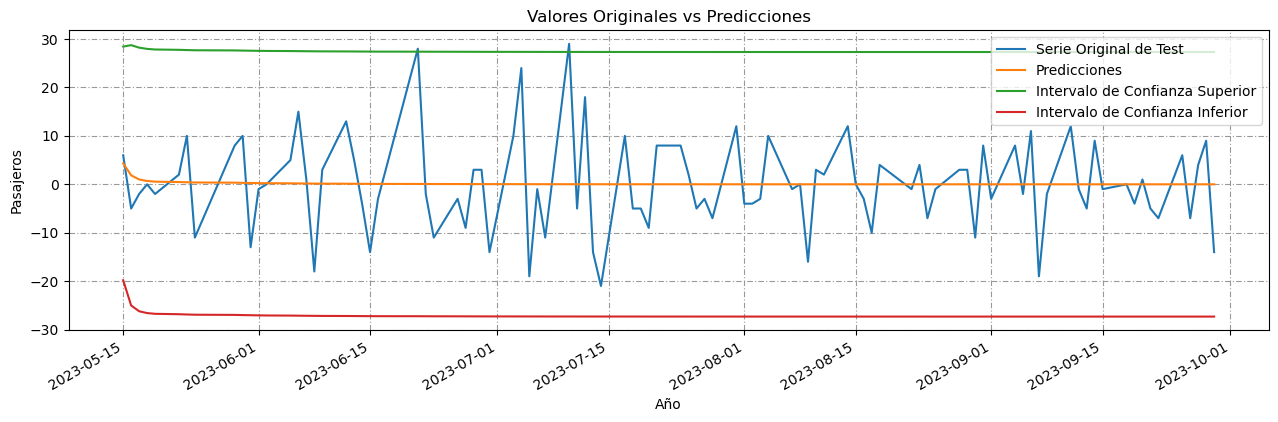

In [78]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_WAPP, WAPP_pred, WAPP_int)

In [79]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE
import numpy as np
def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    

In [80]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_WAPP[:95]), predicciones_sarima_WAPP.predicted_mean)

MSE: 90.9091341701535
MAE: 7.252796302846387
RMSE: 9.534628161084914


**TURNOS PRESENCIALES**

In [81]:
# Seleccionamos el primer 75% para train
train_TP = data_diff_TP.iloc[:round(len(data_diff_TP)*.75)]
# Seleccionamos el 25% restante para test
test_TP = data_diff_TP.iloc[round(len(data_diff_TP)*.75):]
# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_TP, test_TP)

FECHA
2022-03-16    -8.0
2022-03-17    -4.0
2022-03-18   -16.0
2022-03-21    15.0
2022-03-22    -1.0
              ... 
2023-05-08     7.0
2023-05-09    21.0
2023-05-10   -47.0
2023-05-11    37.0
2023-05-12     0.0
Name: TP, Length: 284, dtype: float64 FECHA
2023-05-15    19.0
2023-05-16   -37.0
2023-05-17   -14.0
2023-05-18    25.0
2023-05-19   -30.0
              ... 
2023-09-25    46.0
2023-09-26     6.0
2023-09-27   -10.0
2023-09-28     3.0
2023-09-29     5.0
Name: TP, Length: 95, dtype: float64


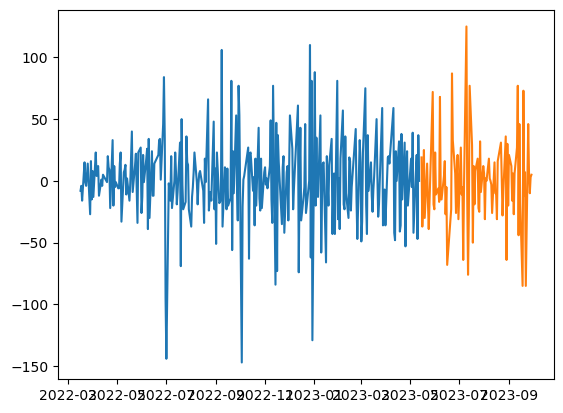

In [82]:
plt.plot(train_TP)
plt.plot(test_TP)

In [83]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA
auto_arima(train_TP, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2834.211, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2807.119, Time=0.24 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2791.746, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2832.234, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=2791.950, Time=0.06 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=2793.491, Time=0.25 sec
 ARIMA(0,0,1)(0,0,2)[7] intercept   : AIC=2793.155, Time=0.28 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=2791.992, Time=0.14 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=2794.755, Time=0.31 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=2836.079, Time=0.03 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=2788.238, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=2787.364, Time=0.08 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=2788.412, Time=0.15 sec
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  284
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1389.810
Date:                Sat, 11 Nov 2023   AIC                           2785.621
Time:                        19:05:32   BIC                           2796.568
Sample:                             0   HQIC                          2790.010
                                - 284                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3684      0.066      5.580      0.000       0.239       0.498
ma.L1         -0.7794      0.038    -20.592      0.000      -0.854      -0.705
sigma2      1041.1596     63.114     16.496      0.000     917.458    1164.861
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                53.67
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             0.27
Prob(H) (two-sided):                  0.72   Kurtosis:                         5.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
modelo_sarima_TP = SARIMAX(train_TP, order=(1,0,1), seasonal_order=(0,0,0,7))
result_sarima_TP = modelo_sarima_TP.fit()
print(result_sarima_TP.summary())

                               SARIMAX Results                                
Dep. Variable:                     TP   No. Observations:                  284
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1389.810
Date:                Sat, 11 Nov 2023   AIC                           2785.621
Time:                        19:05:38   BIC                           2796.568
Sample:                             0   HQIC                          2790.010
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3684      0.066      5.580      0.000       0.239       0.498
ma.L1         -0.7794      0.038    -20.592      0.000      -0.854      -0.705
sigma2      1041.1596     63.114     16.496      0.0

In [85]:
# Utilizando el modelo realizamos la prediccion correspondiente
predicciones_sarima_TP = result_sarima_TP.get_forecast(len(test_TP))

In [86]:
predicciones_TP = result_sarima_TP.get_forecast(95)

In [87]:
TP_pred = predicciones_sarima_TP.predicted_mean
TP_int = predicciones_sarima_TP.conf_int()

In [88]:
TP_pred.index = test_TP.index
TP_int.index = test_TP.index

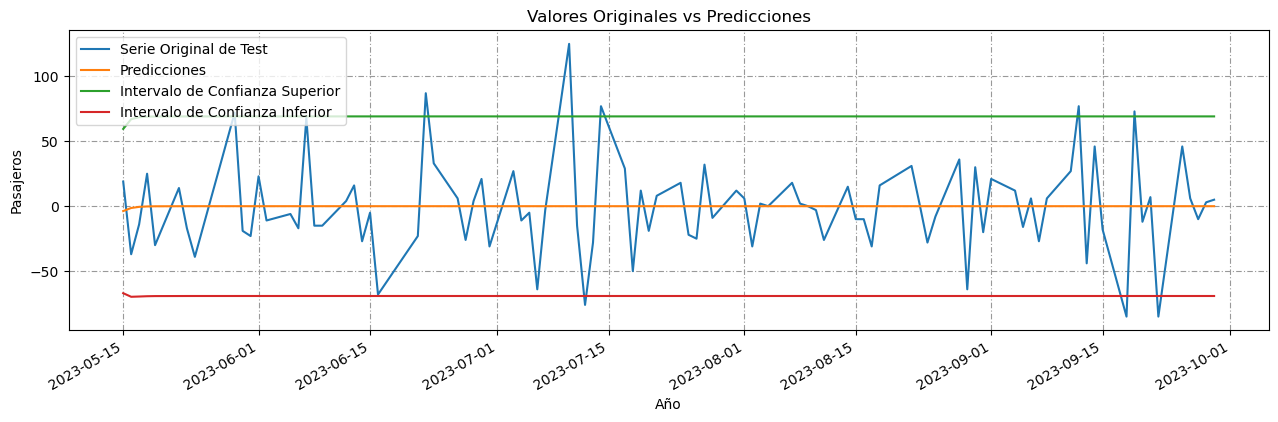

In [89]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_TP, TP_pred, TP_int)

In [90]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    

In [91]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TP[:95]), predicciones_sarima_TP.predicted_mean)

MSE: 1280.0073172953826
MAE: 26.36829489392876
RMSE: 35.77718990216228


**TRÁMITES**

In [92]:
# Seleccionamos el primer 75% para train
train_TAD = data_diff_TAD.iloc[:round(len(data_diff_TAD)*.75)]
# Seleccionamos el 25% restante para test
test_TAD = data_diff_TAD.iloc[round(len(data_diff_TAD)*.75):]
# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_TAD, test_TAD)

FECHA
2022-03-16   -27.0
2022-03-17    15.0
2022-03-18   -21.0
2022-03-21    24.0
2022-03-22   -10.0
              ... 
2023-05-08     4.0
2023-05-09    -5.0
2023-05-10    -9.0
2023-05-11    13.0
2023-05-12    -9.0
Name: TAD, Length: 284, dtype: float64 FECHA
2023-05-15     8.0
2023-05-16    12.0
2023-05-17    -5.0
2023-05-18     0.0
2023-05-19   -17.0
              ... 
2023-09-25     8.0
2023-09-26     4.0
2023-09-27     0.0
2023-09-28    -2.0
2023-09-29   -13.0
Name: TAD, Length: 95, dtype: float64


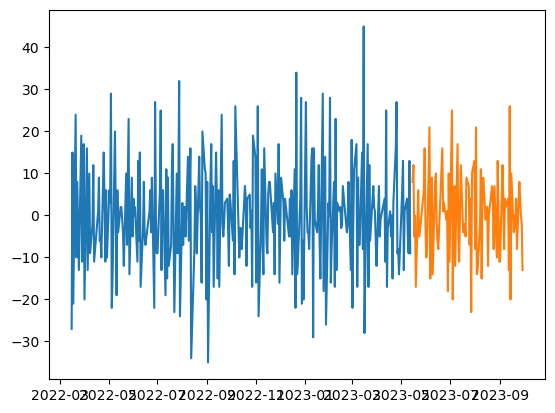

In [93]:
plt.plot(train_TAD)
plt.plot(test_TAD)

In [94]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA
auto_arima(train_TAD, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2276.279, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2209.856, Time=0.14 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2120.568, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2274.287, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=2118.618, Time=0.06 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=2120.560, Time=0.15 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=2119.949, Time=0.42 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=2118.721, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=2207.863, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[7]             : AIC=2117.160, Time=0.03 sec
 ARIMA(0,0,1)(1,0,0)[7]             : AIC=2119.132, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[7]             : AIC=2119.135, Time=0.07 sec
 ARIMA(0,0,1)(1,0,1)[7]             : AIC=2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  284
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1056.580
Date:                Sat, 11 Nov 2023   AIC                           2117.160
Time:                        19:06:48   BIC                           2124.458
Sample:                             0   HQIC                          2120.086
                                - 284                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9537      0.020    -48.883      0.000      -0.992      -0.915
sigma2        98.9266      6.484     15.256      0.000      86.218     111.636
===================================================================================
Ljung-Box (L1) (Q):                   1.73   Jarque-Bera (JB):                31.07
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                             0.52
Prob(H) (two-sided):                  0.17   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
modelo_sarima_TAD = SARIMAX(train_TAD, order=(0,0,1), seasonal_order=(0,0,0,7))
result_sarima_TAD = modelo_sarima_TAD.fit()
print(result_sarima_TAD.summary())

                               SARIMAX Results                                
Dep. Variable:                    TAD   No. Observations:                  284
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1056.580
Date:                Sat, 11 Nov 2023   AIC                           2117.160
Time:                        19:06:54   BIC                           2124.458
Sample:                             0   HQIC                          2120.086
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9537      0.020    -48.883      0.000      -0.992      -0.915
sigma2        98.9266      6.484     15.256      0.000      86.218     111.636
Ljung-Box (L1) (Q):                   1.73   Jarque-

In [96]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TAD = result_sarima_TAD.get_forecast(len(test_TAD))

In [97]:
predicciones_TAD = result_sarima_TAD.get_forecast(95)

In [98]:
TAD_pred = predicciones_sarima_TAD.predicted_mean
TAD_int = predicciones_sarima_TAD.conf_int()

In [99]:
TAD_pred.index = test_TAD.index
TAD_int.index = test_TAD.index

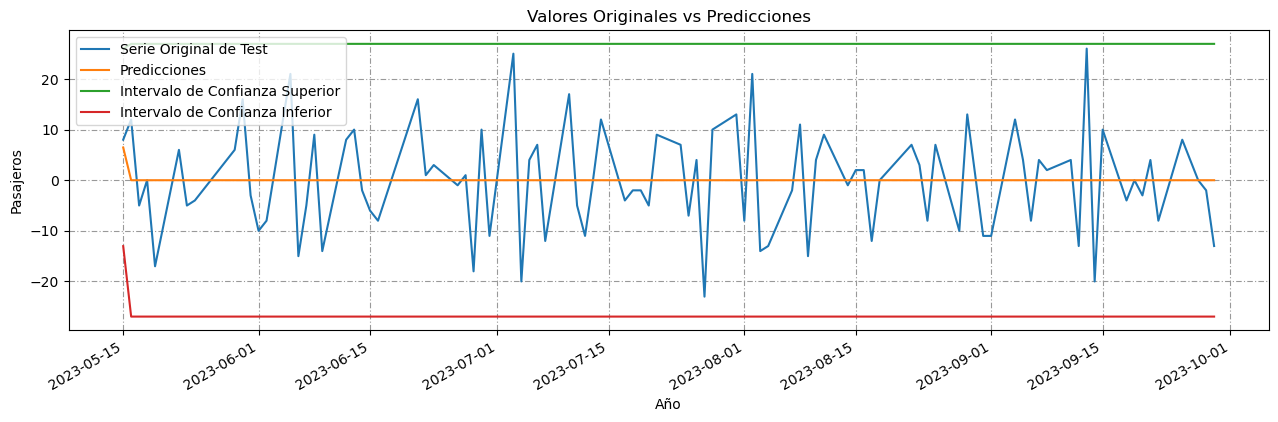

In [100]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_TAD, TAD_pred, TAD_int)

In [101]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
   

In [102]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TAD[:95]), predicciones_sarima_TAD.predicted_mean)

MSE: 105.4981994649892
MAE: 8.26869567898863
RMSE: 10.271231643040148


**PLANES DE PAGO**

In [103]:
# Seleccionamos el primer 75% para train
train_PP = data_diff_PP.iloc[:round(len(data_diff_PP)*.75)]
# Seleccionamos el 25% restante para test
test_PP = data_diff_PP.iloc[round(len(data_diff_PP)*.75):]
# Corroboramos que los limites se hayan establecido segun lo planificado
print(train_PP, test_PP)

FECHA
2022-03-16    3.0
2022-03-17    2.0
2022-03-18   -5.0
2022-03-21   -1.0
2022-03-22    5.0
             ... 
2023-05-08    2.0
2023-05-09   -6.0
2023-05-10   -1.0
2023-05-11    3.0
2023-05-12    3.0
Name: PP, Length: 284, dtype: float64 FECHA
2023-05-15     7.0
2023-05-16   -13.0
2023-05-17     1.0
2023-05-18    19.0
2023-05-19   -24.0
              ... 
2023-09-25     3.0
2023-09-26    -6.0
2023-09-27     0.0
2023-09-28     4.0
2023-09-29    -1.0
Name: PP, Length: 95, dtype: float64


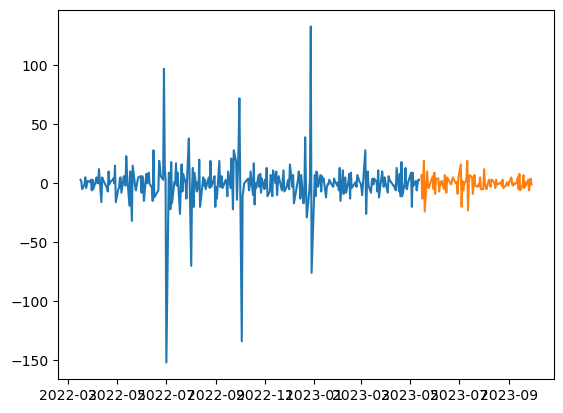

In [104]:
plt.plot(train_PP)
plt.plot(test_PP)

In [105]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA
auto_arima(train_PP, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2519.718, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2511.156, Time=0.09 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2498.718, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2517.719, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=2498.066, Time=0.05 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=2498.820, Time=0.09 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=2500.680, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=2478.079, Time=0.06 sec
 ARIMA(0,0,2)(1,0,0)[7] intercept   : AIC=2478.803, Time=0.14 sec
 ARIMA(0,0,2)(0,0,1)[7] intercept   : AIC=2478.760, Time=0.16 sec
 ARIMA(0,0,2)(1,0,1)[7] intercept   : AIC=2480.758, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,3)(0,0,0)[7] intercept   : AIC=2471.555, Time=0.12 sec
 ARIMA(0,0,3)(1,0,0)[7] intercept   : AIC=2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  284
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1229.413
Date:                Sat, 11 Nov 2023   AIC                           2464.825
Time:                        19:07:21   BIC                           2475.772
Sample:                             0   HQIC                          2469.214
                                - 284                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5816      0.039     14.869      0.000       0.505       0.658
ma.L1         -0.9686      0.021    -46.763      0.000      -1.009      -0.928
sigma2       335.1362      8.871     37.777      0.000     317.748     352.524
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4364.95
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             1.93
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [106]:
modelo_sarima_PP = SARIMAX(train_PP, order=(1,0,1), seasonal_order=(0,0,0,7))
result_sarima_PP = modelo_sarima_PP.fit()
print(result_sarima_PP.summary())

                               SARIMAX Results                                
Dep. Variable:                     PP   No. Observations:                  284
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1229.413
Date:                Sat, 11 Nov 2023   AIC                           2464.825
Time:                        19:07:27   BIC                           2475.772
Sample:                             0   HQIC                          2469.214
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5816      0.039     14.869      0.000       0.505       0.658
ma.L1         -0.9686      0.021    -46.763      0.000      -1.009      -0.928
sigma2       335.1362      8.871     37.777      0.0

In [107]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_PP = result_sarima_PP.get_forecast(len(test_PP))

In [108]:
predicciones_PP = result_sarima_PP.get_forecast(95)

In [109]:
PP_pred = predicciones_sarima_PP.predicted_mean
PP_int = predicciones_sarima_PP.conf_int()

In [110]:
PP_pred.index = test_PP.index
PP_int.index = test_PP.index

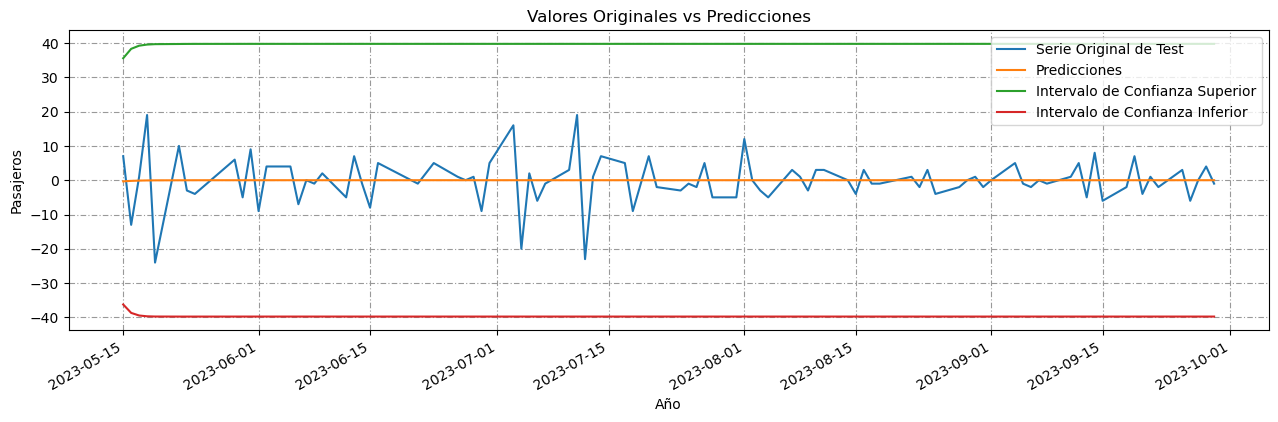

In [111]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_PP, PP_pred, PP_int)

In [112]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    

In [113]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_PP[:95]), predicciones_sarima_PP.predicted_mean)

MSE: 46.17912003062302
MAE: 4.655594921223892
RMSE: 6.795522057253807


---
## **7. Detallar una comparación con otros modelos estimados.**

**WAPP**

**WAPP1**

In [114]:
modelo_sarima_WAPP1 = SARIMAX(train_WAPP, order=(1,0,2), seasonal_order=(0,0,0,7))
result_sarima_WAPP1 = modelo_sarima_WAPP1.fit()
print(result_sarima_WAPP1.summary())

                               SARIMAX Results                                
Dep. Variable:                   WAPP   No. Observations:                  284
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -1119.031
Date:                Sat, 11 Nov 2023   AIC                           2246.062
Time:                        19:09:56   BIC                           2260.658
Sample:                             0   HQIC                          2251.914
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7806      0.042     18.549      0.000       0.698       0.863
ma.L1         -1.2862      0.612     -2.101      0.036      -2.486      -0.086
ma.L2          0.2864      0.194      1.474      0.1

In [115]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_WAPP1 = result_sarima_WAPP1.get_forecast(len(test_WAPP))

In [116]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    

In [117]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_WAPP[:95]), predicciones_sarima_WAPP1.predicted_mean)

MSE: 90.98969137307826
MAE: 7.26445135447051
RMSE: 9.538851680002066


**WAPP2**

In [118]:
modelo_sarima_WAPP2 = SARIMAX(train_WAPP, order=(2,0,1), seasonal_order=(0,0,0,7))
result_sarima_WAPP2 = modelo_sarima_WAPP2.fit()
print(result_sarima_WAPP2.summary())

                               SARIMAX Results                                
Dep. Variable:                   WAPP   No. Observations:                  284
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1120.124
Date:                Sat, 11 Nov 2023   AIC                           2248.248
Time:                        19:10:37   BIC                           2262.844
Sample:                             0   HQIC                          2254.100
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4475      0.066      6.790      0.000       0.318       0.577
ar.L2          0.0534      0.064      0.834      0.404      -0.072       0.179
ma.L1         -0.9079      0.041    -22.255      0.0

In [119]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_WAPP2 = result_sarima_WAPP2.get_forecast(len(test_WAPP))

In [120]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    

In [121]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_WAPP[:95]), predicciones_sarima_WAPP2.predicted_mean)

MSE: 90.97908008385623
MAE: 7.261640803797136
RMSE: 9.538295449599799


**TP1**

In [123]:
modelo_sarima_TP1 = SARIMAX(train_TP, order=(0,0,1), seasonal_order=(0,0,0,7))
result_sarima_TP1 = modelo_sarima_TP1.fit()
print(result_sarima_TP1.summary())

                               SARIMAX Results                                
Dep. Variable:                     TP   No. Observations:                  284
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1393.025
Date:                Sat, 11 Nov 2023   AIC                           2790.050
Time:                        19:11:47   BIC                           2797.348
Sample:                             0   HQIC                          2792.976
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4666      0.033    -14.199      0.000      -0.531      -0.402
sigma2      1065.5454     55.218     19.297      0.000     957.320    1173.771
Ljung-Box (L1) (Q):                   0.76   Jarque-

In [124]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TP1 = result_sarima_TP1.get_forecast(len(test_TP))

In [125]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
   

In [126]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TP[:95]), predicciones_sarima_TP1.predicted_mean)

MSE: 1281.3646901398856
MAE: 26.391444056051096
RMSE: 35.7961546837071


**TP2**

In [127]:
modelo_sarima_TP2 = SARIMAX(train_TP, order=(1,0,0), seasonal_order=(0,0,0,7))
result_sarima_TP2 = modelo_sarima_TP2.fit()
print(result_sarima_TP2.summary())

                               SARIMAX Results                                
Dep. Variable:                     TP   No. Observations:                  284
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1399.916
Date:                Sat, 11 Nov 2023   AIC                           2803.832
Time:                        19:12:30   BIC                           2811.130
Sample:                             0   HQIC                          2806.758
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3181      0.040     -8.024      0.000      -0.396      -0.240
sigma2      1119.1088     59.271     18.881      0.000    1002.941    1235.277
Ljung-Box (L1) (Q):                   0.91   Jarque-

In [128]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TP2 = result_sarima_TP2.get_forecast(len(test_TP))

In [129]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
   

In [130]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TP[:95]), predicciones_sarima_TP2.predicted_mean)

MSE: 1279.5052631578947
MAE: 26.347368421052632
RMSE: 35.77017281420226


**TAD1**

In [131]:
modelo_sarima_TAD1 = SARIMAX(train_TAD, order=(1,0,1), seasonal_order=(0,0,0,7))
result_sarima_TAD1 = modelo_sarima_TAD1.fit()
print(result_sarima_TAD1.summary())

                               SARIMAX Results                                
Dep. Variable:                    TAD   No. Observations:                  284
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1055.745
Date:                Sat, 11 Nov 2023   AIC                           2117.490
Time:                        19:13:12   BIC                           2128.437
Sample:                             0   HQIC                          2121.879
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0817      0.067      1.223      0.221      -0.049       0.213
ma.L1         -0.9636      0.019    -50.912      0.000      -1.001      -0.926
sigma2        98.3183      6.429     15.293      0.0

In [132]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TAD1 = result_sarima_TAD1.get_forecast(len(test_TAD))

In [133]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
   

In [134]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TAD[:95]), predicciones_sarima_TAD1.predicted_mean)

MSE: 105.412165934983
MAE: 8.271369847756617
RMSE: 10.267042706397154


**TAD2**

In [135]:
modelo_sarima_TAD2 = SARIMAX(train_TAD, order=(1,0,0), seasonal_order=(0,0,0,7))
result_sarima_TAD2 = modelo_sarima_TAD2.fit()
print(result_sarima_TAD2.summary())

                               SARIMAX Results                                
Dep. Variable:                    TAD   No. Observations:                  284
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1100.933
Date:                Sat, 11 Nov 2023   AIC                           2205.867
Time:                        19:13:30   BIC                           2213.165
Sample:                             0   HQIC                          2208.793
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4715      0.052     -9.079      0.000      -0.573      -0.370
sigma2       136.2215     10.211     13.341      0.000     116.208     156.235
Ljung-Box (L1) (Q):                   4.91   Jarque-

In [136]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TAD2 = result_sarima_TAD2.get_forecast(len(test_TAD))

In [137]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
   

In [138]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TAD[:95]), predicciones_sarima_TAD2.predicted_mean)

MSE: 106.37243621316266
MAE: 8.331325411971331
RMSE: 10.313701382780222


**PP1**

In [139]:
modelo_sarima_PP1 = SARIMAX(train_PP, order=(0,0,1), seasonal_order=(0,0,0,7))
result_sarima_PP1 = modelo_sarima_PP1.fit()
print(result_sarima_PP1.summary())

                               SARIMAX Results                                
Dep. Variable:                     PP   No. Observations:                  284
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1246.033
Date:                Sat, 11 Nov 2023   AIC                           2496.066
Time:                        19:13:52   BIC                           2503.364
Sample:                             0   HQIC                          2498.992
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4162      0.023    -17.942      0.000      -0.462      -0.371
sigma2       378.5429     10.207     37.086      0.000     358.537     398.548
Ljung-Box (L1) (Q):                   3.04   Jarque-

In [140]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_PP1 = result_sarima_PP1.get_forecast(len(test_PP))

In [141]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    

In [142]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_PP[:95]), predicciones_sarima_PP1.predicted_mean)

MSE: 46.419465330015974
MAE: 4.6687913121333295
RMSE: 6.813183200972653


**PP2**

In [143]:
modelo_sarima_PP2 = SARIMAX(train_PP, order=(1,0,0), seasonal_order=(0,0,0,7))
result_sarima_PP2 = modelo_sarima_PP2.fit()
print(result_sarima_PP2.summary())

                               SARIMAX Results                                
Dep. Variable:                     PP   No. Observations:                  284
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1251.715
Date:                Sat, 11 Nov 2023   AIC                           2507.431
Time:                        19:14:12   BIC                           2514.728
Sample:                             0   HQIC                          2510.356
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2054      0.028     -7.424      0.000      -0.260      -0.151
sigma2       394.2007      9.136     43.146      0.000     376.294     412.108
Ljung-Box (L1) (Q):                   0.55   Jarque-

In [144]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_PP2 = result_sarima_PP2.get_forecast(len(test_PP))

In [145]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    

In [146]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_PP[:95]), predicciones_sarima_PP2.predicted_mean)

MSE: 46.29586931340763
MAE: 4.660654532634971
RMSE: 6.804106797619187


**COMPARACIÓN DE MODELOS**

In [409]:
datos_wapp = {'Modelos': ['WAPP','WAPP1','WAPP2'],
         'AIC': [result_sarima_WAPP.aic, result_sarima_WAPP1.aic, result_sarima_WAPP2.aic ],
         'BIC': [result_sarima_WAPP.bic, result_sarima_WAPP1.bic, result_sarima_WAPP2.bic],
         'MSE': [result_sarima_WAPP.mse, result_sarima_WAPP1.mse, result_sarima_WAPP2.mse],
         'MAE': [result_sarima_WAPP.mae, result_sarima_WAPP1.mae, result_sarima_WAPP2.mae],
         'RMSE': [result_sarima_WAPP.rmse, result_sarima_WAPP1.rmse, result_sarima_WAPP2.rmse]}

modelos_residuos_wapp = pd.DataFrame(datos_wapp)
modelos_residuos_wapp


AttributeError: 'SARIMAXResults' object has no attribute 'rmse'

In [ ]:
datos_tp = {'Modelos': ['TP','TP1','TP2'],
         'AIC': [result_sarima_TP.aic, result_sarima_TP1.aic, result_sarima_TP2.aic ],
         'BIC': [result_sarima_TP.bic, result_sarima_TP1.bic, result_sarima_TP2.bic],
         'MSE': [result_sarima_TP.mse, result_sarima_TP1.mse, result_sarima_TP2.mse],
         'MAE': [result_sarima_TP.mae, result_sarima_TP1.mae, result_sarima_TP2.mae],
         'RMSE': [result_sarima_TP.rmse, result_sarima_TP1.rmse, result_sarima_TP2.rmse]}

modelos_residuos_tp = pd.DataFrame(datos_tp)
modelos_residuos_tp

In [ ]:
datos_tad = {'Modelos': ['TAD','TAD1','TAD2'],
         'AIC': [result_sarima_TAD.aic, result_sarima_TAD1.aic, result_sarima_TAD2.aic ],
         'BIC': [result_sarima_TAD.bic, result_sarima_TAD1.bic, result_sarima_TAD2.bic],
         'MSE': [result_sarima_TAD.mse, result_sarima_TAD1.mse, result_sarima_TAD2.mse],
         'MAE': [result_sarima_TAD.mae, result_sarima_TAD1.mae, result_sarima_TAD2.mae],
         'RMSE': [result_sarima_TAD.rmse, result_sarima_TAD1.rmse, result_sarima_TAD2.rmse]}

modelos_residuos_tad = pd.DataFrame(datos_tad)
modelos_residuos_tad

In [ ]:
datos_pp = {'Modelos': ['PP','PP1','PP2'],
         'AIC': [result_sarima_PP.aic, result_sarima_PP1.aic, result_sarima_PP2.aic ],
         'BIC': [result_sarima_PP.bic, result_sarima_PP1.bic, result_sarima_PP2.bic],
         'MSE': [result_sarima_PP.mse, result_sarima_PP1.mse, result_sarima_PP2.mse],
         'MAE': [result_sarima_PP.mae, result_sarima_PP1.mae, result_sarima_PP2.mae],
         'RMSE': [result_sarima_PP.rmse, result_sarima_PP1.rmse, result_sarima_PP2.rmse]}

modelos_residuos_pp = pd.DataFrame(datos_pp)
modelos_residuos_pp

---
## **8. Efectuar un Análisis de Diagnóstico de las series temporales (Análisis sobre los Residuos del modelo, análisis gráfico de FAC, test de Ljung-Box, etc.).**

**EVALUACIÓN DE RESIDUOS**

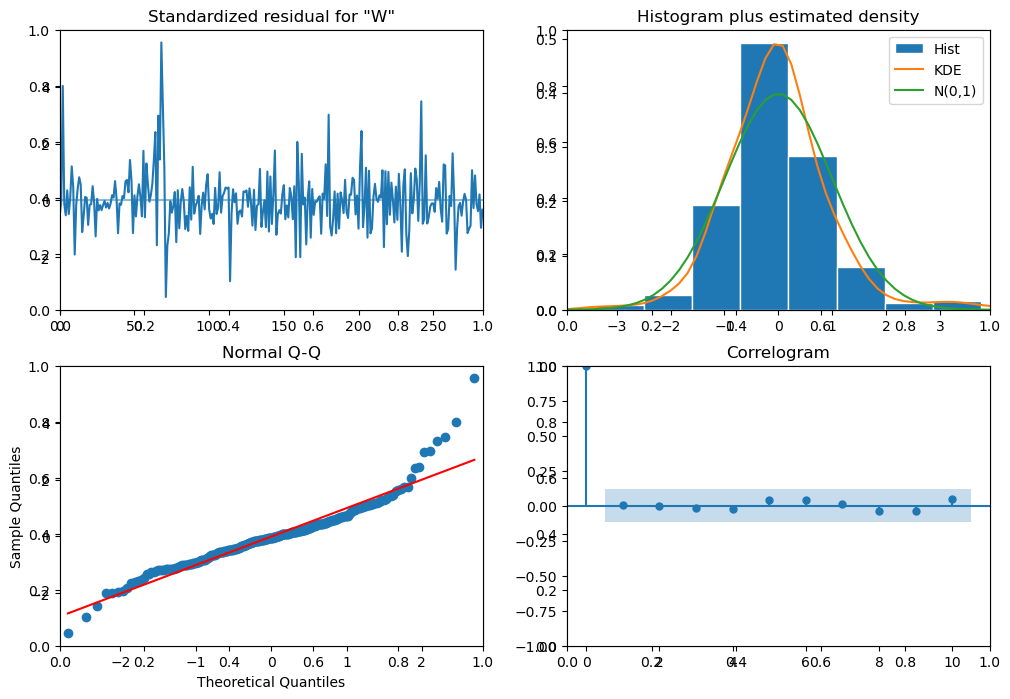

In [147]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_WAPP.plot_diagnostics(fig=fig)
plt.show()

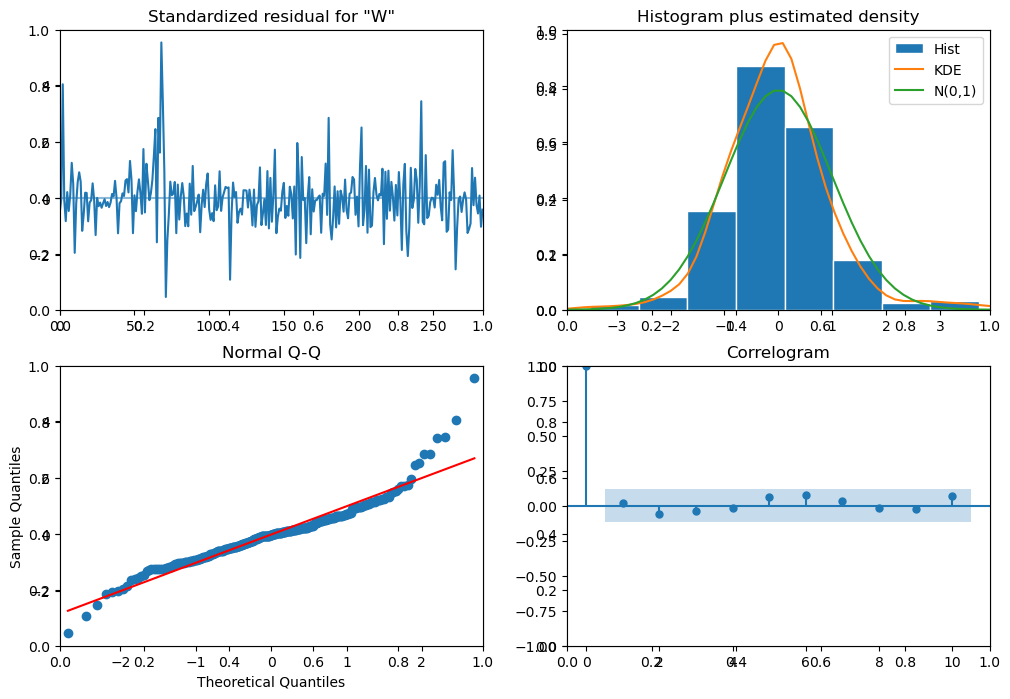

In [148]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_WAPP1.plot_diagnostics(fig=fig)
plt.show()

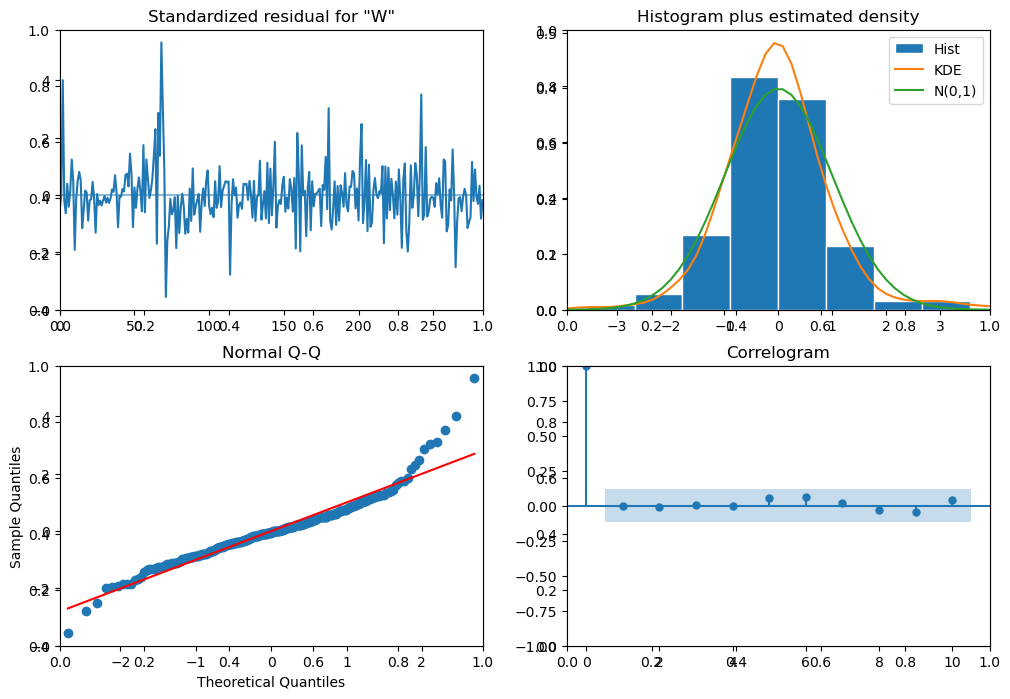

In [149]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_WAPP2.plot_diagnostics(fig=fig)
plt.show()

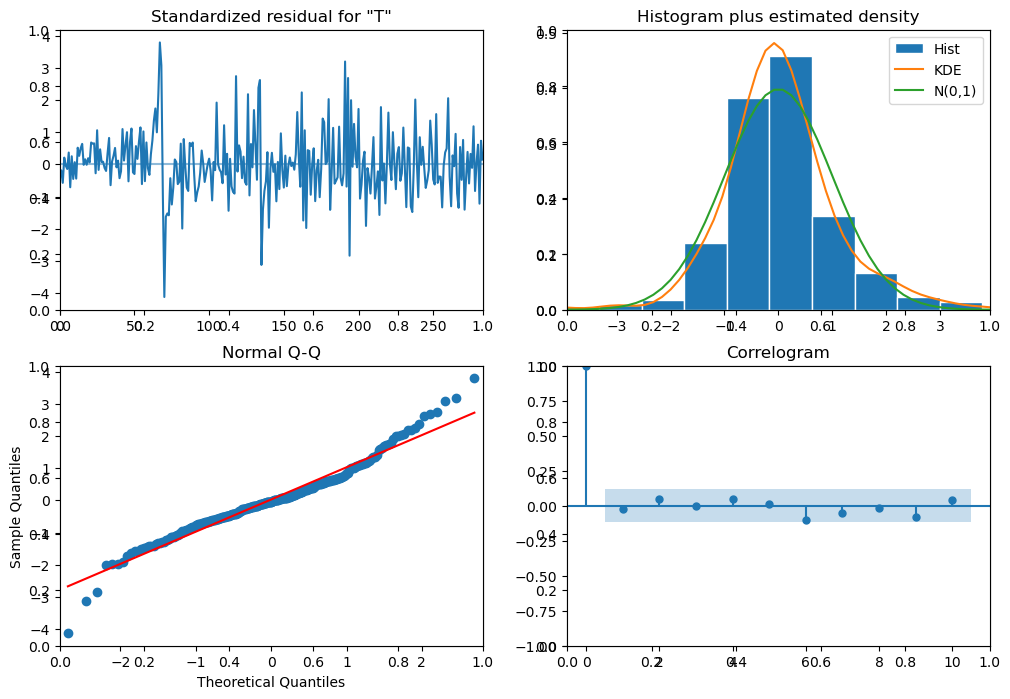

In [150]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_TP.plot_diagnostics(fig=fig)
plt.show()

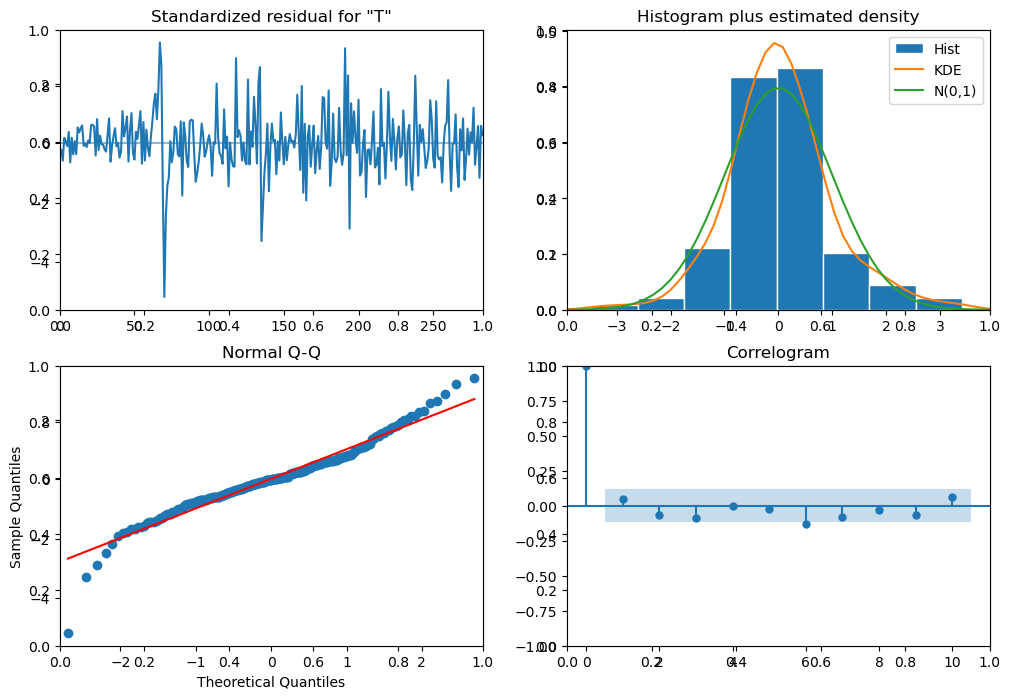

In [151]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_TP1.plot_diagnostics(fig=fig)
plt.show()

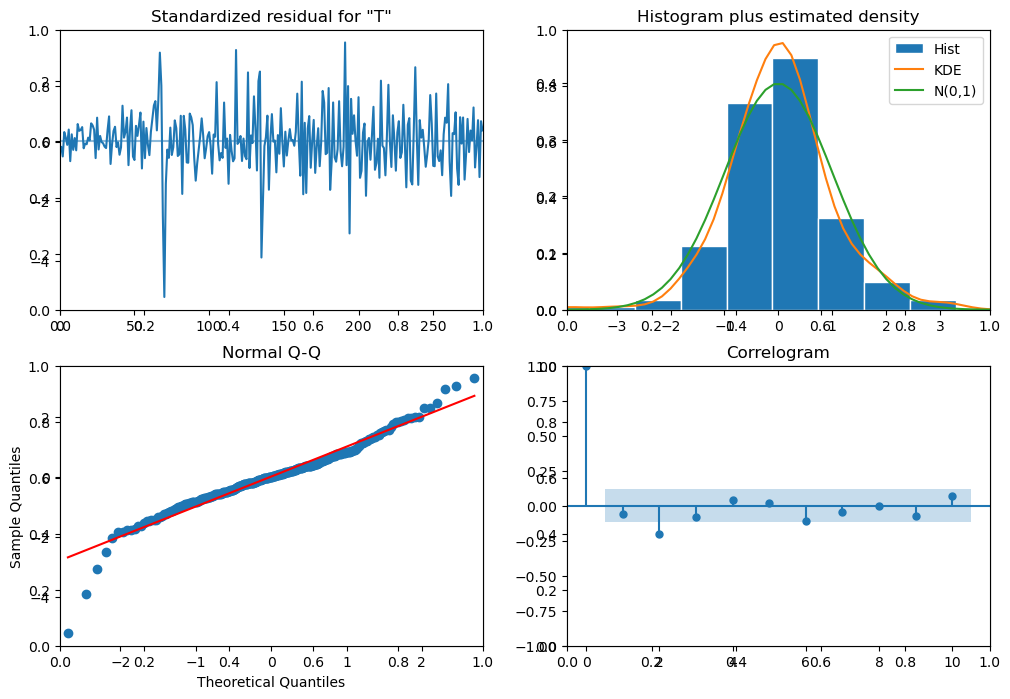

In [152]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_TP2.plot_diagnostics(fig=fig)
plt.show()

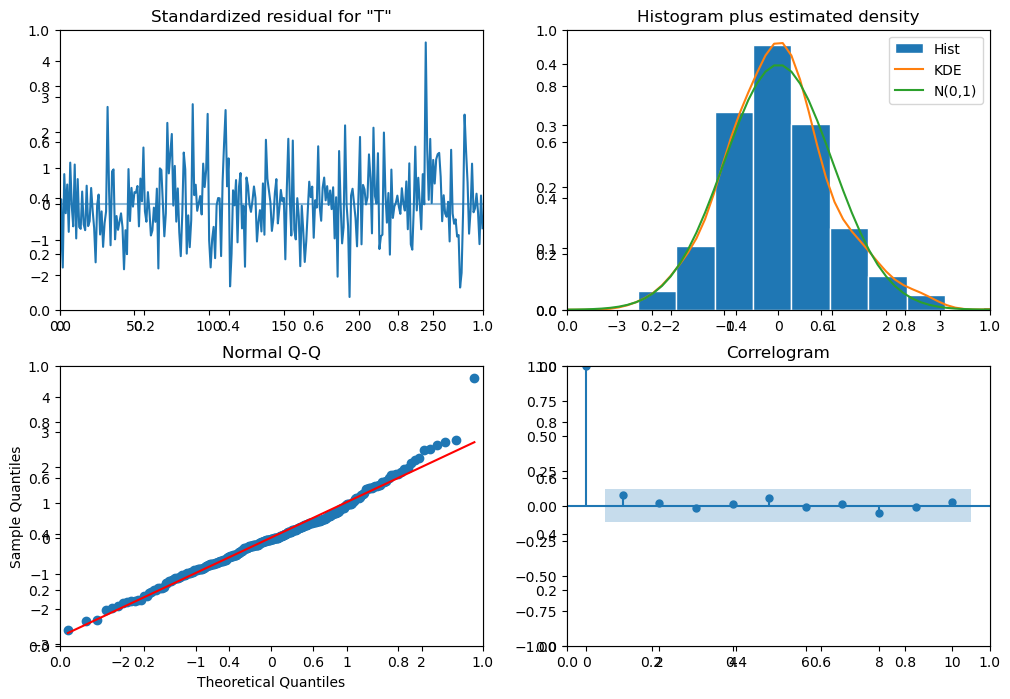

In [153]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_TAD.plot_diagnostics(fig=fig)
plt.show()

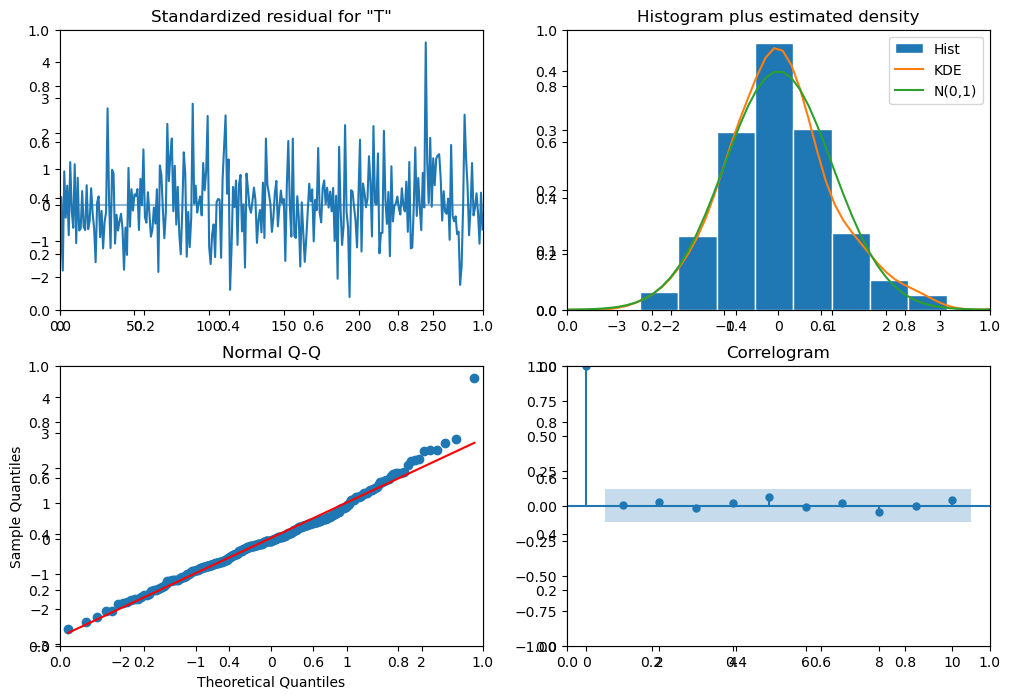

In [154]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_TAD1.plot_diagnostics(fig=fig)
plt.show()

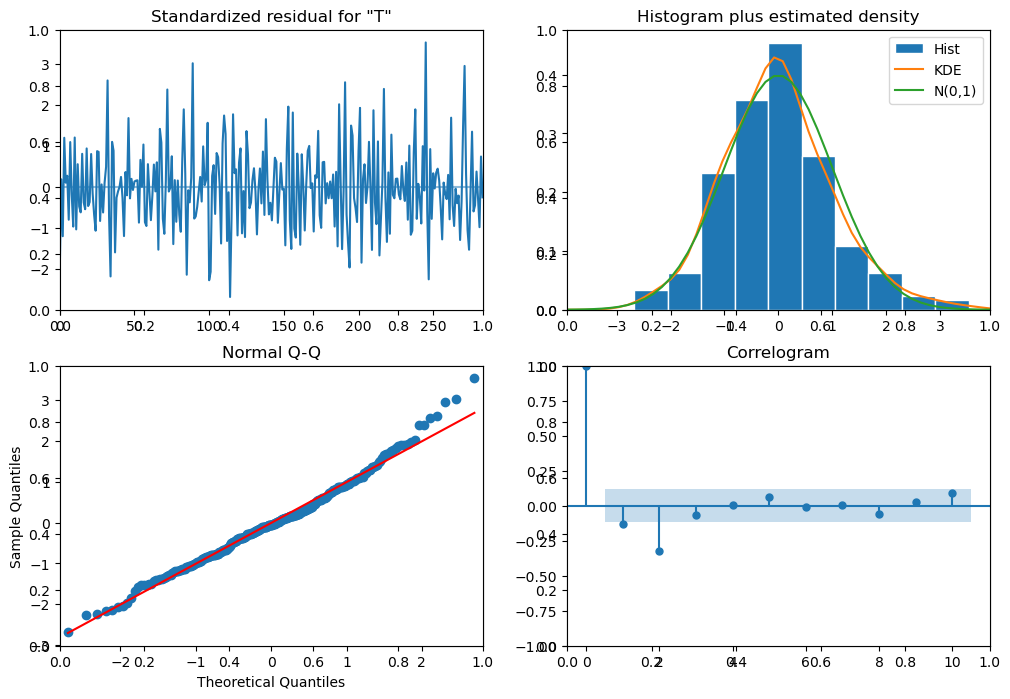

In [155]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_TAD2.plot_diagnostics(fig=fig)
plt.show()

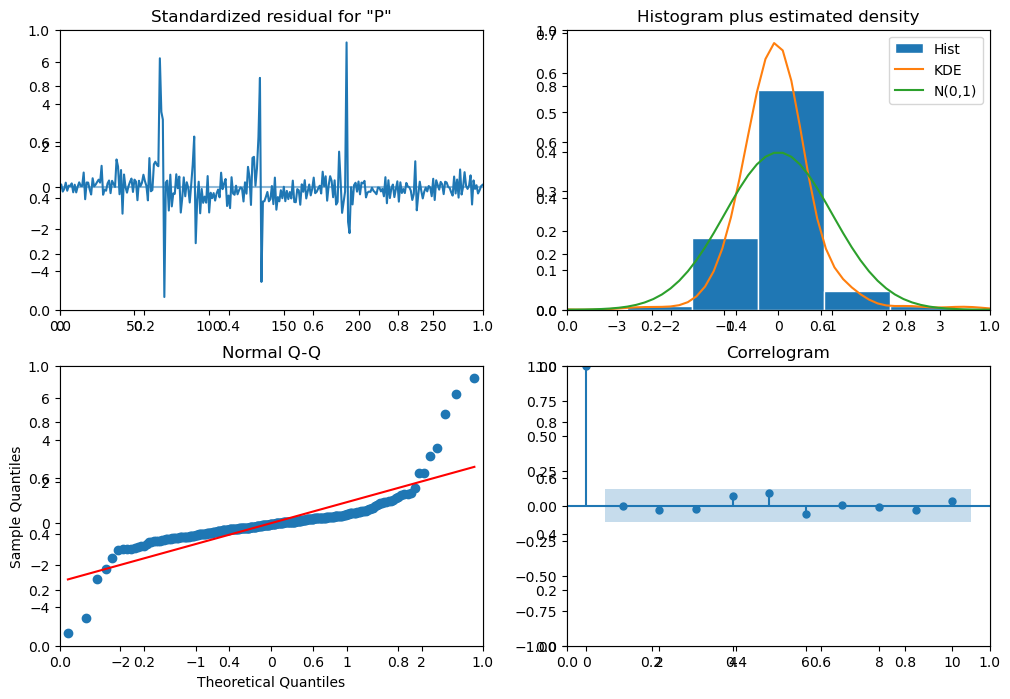

In [156]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_PP.plot_diagnostics(fig=fig)
plt.show()

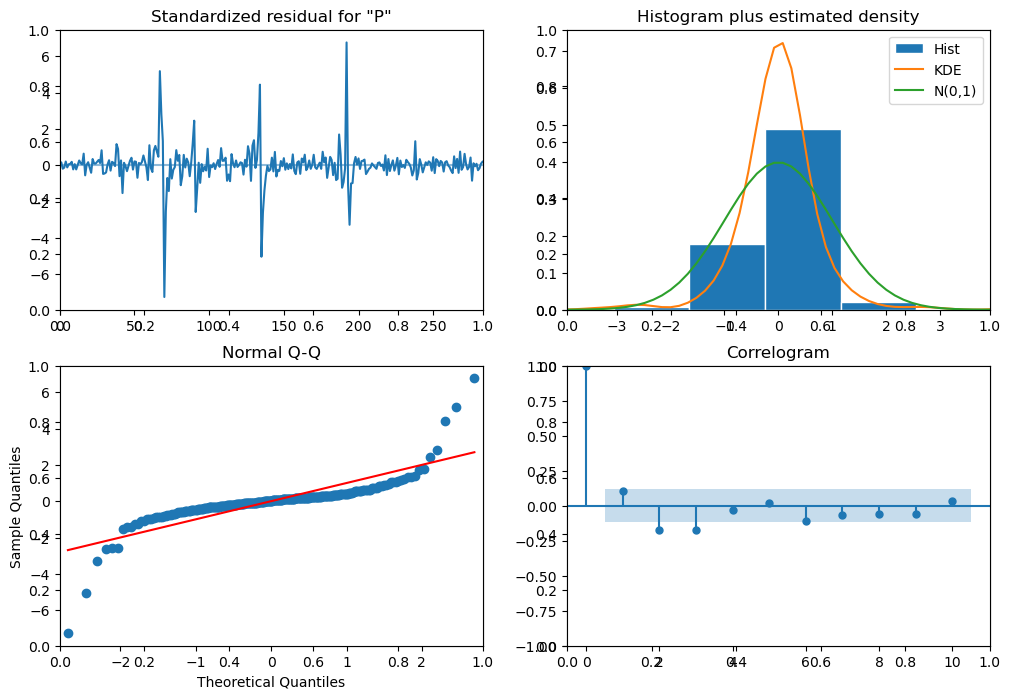

In [157]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_PP1.plot_diagnostics(fig=fig)
plt.show()

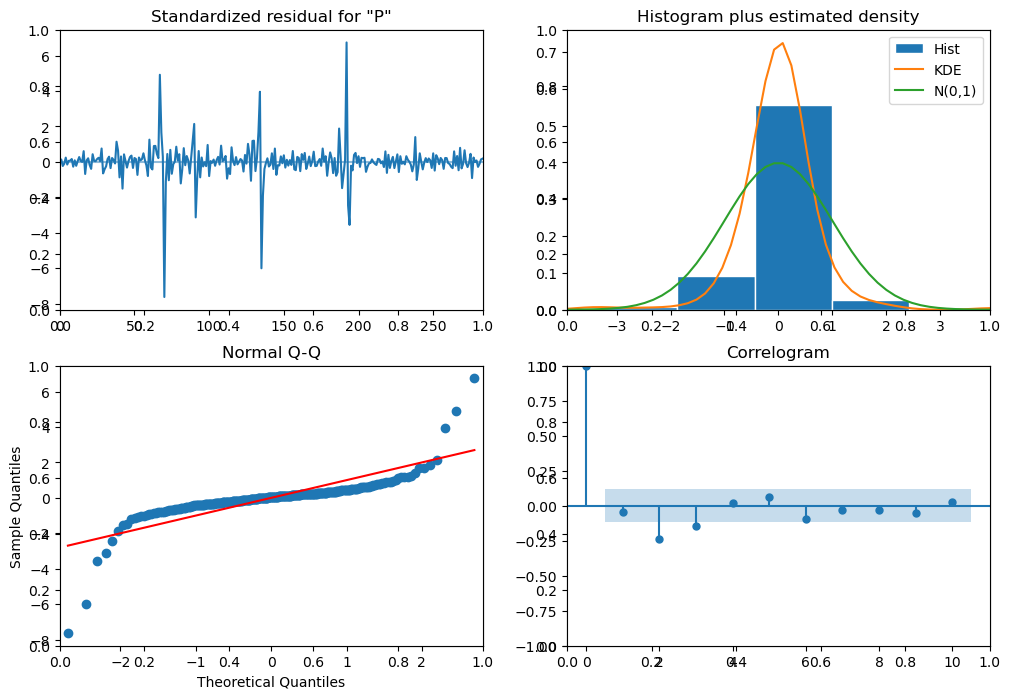

In [158]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
result_sarima_PP2.plot_diagnostics(fig=fig)
plt.show()

**Test de Breusch-Godfrey, test Ljung-Box de correlación serial y test de Jarque-Bera de normalidad**

**WAPP**

In [159]:
import statsmodels.api as sm
bg_WAPP = sm.stats.diagnostic.acorr_breusch_godfrey(result_sarima_WAPP, nlags=3)
fstat = bg_WAPP[2]
fpval = bg_WAPP[3]
print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

fstat: 0.01961190155931089

fpval: 0.9962614190583873



In [160]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan
residuos_WAPP = result_sarima_WAPP.resid
# Test de Ljung-Box
lb_test_WAPP = acorr_ljungbox(residuos_WAPP, lags=1)  # Ajusta el número de rezagos si es necesario
print(lb_test_WAPP)

    lb_stat  lb_pvalue
1  0.001808    0.96608


In [161]:
import statsmodels.stats.stattools
from statsmodels.stats.stattools import jarque_bera
residuos_WAPP = result_sarima_WAPP.resid
# Test de Jarque-Bera
jb_test_WAPP = jarque_bera(residuos_WAPP)
print(f"Estadístico de Jarque-Bera: {jb_test_WAPP[0]}")
print(f"P-valor: {jb_test_WAPP[1]}")

Estadístico de Jarque-Bera: 341.99821967945206
P-valor: 5.445405005680975e-75


**TP**

In [162]:
bg_TP = sm.stats.diagnostic.acorr_breusch_godfrey(result_sarima_TP, nlags=3)
fstat = bg_TP[2]
fpval = bg_TP[3]
print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

fstat: 0.24871708680270008

fpval: 0.8622189621375662



In [163]:
residuos_TP = result_sarima_TP.resid
# Test de Ljung-Box
lb_test_TP = acorr_ljungbox(residuos_TP, lags=1)  # Ajusta el número de rezagos si es necesario
print(lb_test_TP)

    lb_stat  lb_pvalue
1  0.140075   0.708207


In [164]:
residuos_TP = result_sarima_TP.resid
# Test de Jarque-Bera
jb_test_TP = jarque_bera(residuos_TP)
print(f"Estadístico de Jarque-Bera: {jb_test_TP[0]}")
print(f"P-valor: {jb_test_TP[1]}")

Estadístico de Jarque-Bera: 53.62560393730779
P-valor: 2.266460009945491e-12


**TAD**

In [165]:
bg_TAD = sm.stats.diagnostic.acorr_breusch_godfrey(result_sarima_TAD, nlags=3)
fstat = bg_TAD[2]
fpval = bg_TAD[3]
print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

fstat: 0.6186872988784698

fpval: 0.6034197046108545



In [166]:
residuos_TAD = result_sarima_TAD.resid
# Test de Ljung-Box
lb_test_TAD = acorr_ljungbox(residuos_TAD, lags=1)  # Ajusta el número de rezagos si es necesario
print(lb_test_TAD)

    lb_stat  lb_pvalue
1  1.545548   0.213794


In [167]:
residuos_TAD = result_sarima_TAD.resid
# Test de Jarque-Bera
jb_test_TAD = jarque_bera(residuos_TAD)
print(f"Estadístico de Jarque-Bera: {jb_test_TAD[0]}")
print(f"P-valor: {jb_test_TAD[1]}")

Estadístico de Jarque-Bera: 29.194294983959573
P-valor: 4.576562447390208e-07


**PP**

In [168]:
bg_PP = sm.stats.diagnostic.acorr_breusch_godfrey(result_sarima_PP, nlags=3)
fstat = bg_PP[2]
fpval = bg_PP[3]
print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

fstat: 0.12242983628597488

fpval: 0.9468303904402394



In [169]:
residuos_PP = result_sarima_PP.resid
# Test de Ljung-Box
lb_test_PP = acorr_ljungbox(residuos_PP, lags=1)  # Ajusta el número de rezagos si es necesario
print(lb_test_PP)

    lb_stat  lb_pvalue
1  0.000009   0.997608


In [170]:
residuos_PP = result_sarima_PP.resid
# Test de Breusch-Godfrey
lags = 1  # Número de rezagos a incluir en el test
# Test de Jarque-Bera
jb_test_PP = jarque_bera(residuos_PP)
print(f"Estadístico de Jarque-Bera: {jb_test_PP[0]}")
print(f"P-valor: {jb_test_PP[1]}")

Estadístico de Jarque-Bera: 4357.927666727082
P-valor: 0.0


**Test de Breusch-Pagan**

**WAPP**

In [171]:
import statsmodels.api as sm
residuos_WAPP = result_sarima_WAPP.resid
exog = sm.add_constant(np.arange(len(residuos_WAPP)))
bp_WAPP = sm.stats.het_breuschpagan(residuos_WAPP, exog_het=exog)
bp_statistic = bp_WAPP[0]
bp_pval = bp_WAPP[1]
print(f'bp_statistic: {bp_statistic}\n')
print(f'bp_pval: {bp_pval}\n')

bp_statistic: 0.8451535748557553

bp_pval: 0.35792699331075595



**TP**

In [172]:
residuos_TP = result_sarima_TP.resid
exog = sm.add_constant(np.arange(len(residuos_TP)))
bp_TP = sm.stats.het_breuschpagan(residuos_TP, exog_het=exog)
bp_statistic = bp_TP[0]
bp_pval = bp_TP[1]
print(f'bp_statistic: {bp_statistic}\n')
print(f'bp_pval: {bp_pval}\n')


bp_statistic: 0.15444445805248774

bp_pval: 0.6943237493933425



**TAD**

In [173]:
residuos_TAD = result_sarima_TAD.resid
exog = sm.add_constant(np.arange(len(residuos_TAD)))
bp_TAD = sm.stats.het_breuschpagan(residuos_TAD, exog_het=exog)
bp_statistic = bp_TAD[0]
bp_pval = bp_TAD[1]
print(f'bp_statistic: {bp_statistic}\n')
print(f'bp_pval: {bp_pval}\n')

bp_statistic: 0.35837677240150745

bp_pval: 0.5494091194426596



**PP**

In [174]:
residuos_PP = result_sarima_PP.resid
exog = sm.add_constant(np.arange(len(residuos_PP)))
bp_PP = sm.stats.het_breuschpagan(residuos_PP, exog_het=exog)
bp_statistic = bp_PP[0]
bp_pval = bp_PP[1]
print(f'bp_statistic: {bp_statistic}\n')
print(f'bp_pval: {bp_pval}\n')


bp_statistic: 0.806622396719356

bp_pval: 0.3691207280770302



---
### **9. Pronosticar con el modelo seleccionado para cada serie para una ventana temporal razonable, en función de la periodicidad y el comportamiento de las mismas.**

**Para realizar los pronósticos seleccionamos los 4 mejores modelos del punto 6 WAPP:(ARIMA 2,0,2), TP:(ARIMA 2,0,1), TAD:(ARIMA 1,0,1) y PP:(ARIMA 1,0,1)**

**WAPP**

In [175]:
modelo_sarima_WAPP = SARIMAX(train_WAPP, order=(2,0,2), seasonal_order=(0,0,0,7))
result_sarima_WAPP = modelo_sarima_WAPP.fit()
print(result_sarima_WAPP.summary())

                               SARIMAX Results                                
Dep. Variable:                   WAPP   No. Observations:                  284
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1117.160
Date:                Sat, 11 Nov 2023   AIC                           2244.320
Time:                        19:25:50   BIC                           2262.565
Sample:                             0   HQIC                          2251.635
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2315      0.219      5.630      0.000       0.803       1.660
ar.L2         -0.2963      0.145     -2.050      0.040      -0.580      -0.013
ma.L1         -1.7256      1.798     -0.960      0.3

In [176]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))


In [177]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_WAPP = result_sarima_WAPP.get_forecast(len(test_WAPP))

In [178]:
predicciones_WAPP = result_sarima_WAPP.get_forecast(10)

In [179]:
WAPP_pred = predicciones_sarima_WAPP.predicted_mean
WAPP_int = predicciones_sarima_WAPP.conf_int()

In [180]:
WAPP_pred.index = test_WAPP.index
WAPP_int.index = test_WAPP.index


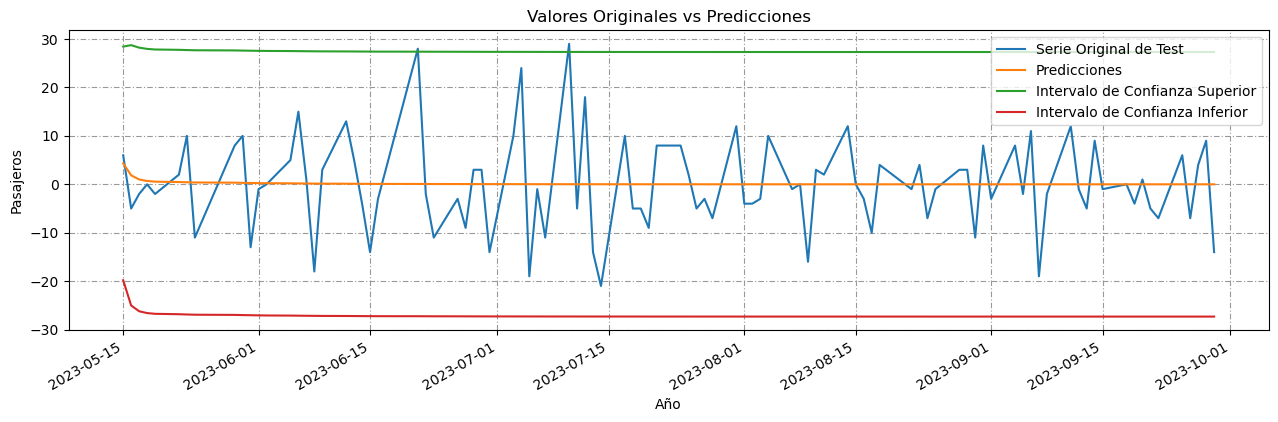

In [181]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_WAPP, WAPP_pred, WAPP_int)


In [182]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
   

In [183]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_WAPP[:95]), predicciones_sarima_WAPP.predicted_mean)


MSE: 90.9091341701535
MAE: 7.252796302846387
RMSE: 9.534628161084914


**TP**

In [188]:
modelo_sarima_TP = SARIMAX(train_TP, order=(2,0,1), seasonal_order=(0,0,0,7))
result_sarima_TP = modelo_sarima_TP.fit()
print(result_sarima_TP.summary())

                               SARIMAX Results                                
Dep. Variable:                     TP   No. Observations:                  284
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1389.022
Date:                Sat, 11 Nov 2023   AIC                           2786.044
Time:                        20:03:10   BIC                           2800.640
Sample:                             0   HQIC                          2791.896
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4234      0.079      5.382      0.000       0.269       0.578
ar.L2          0.0977      0.069      1.408      0.159      -0.038       0.234
ma.L1         -0.8548      0.062    -13.839      0.0

In [189]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TP = result_sarima_TP.get_forecast(len(test_TP))


In [190]:
predicciones_TP = result_sarima_TP.get_forecast(10)

In [191]:
TP_pred = predicciones_sarima_TP.predicted_mean
TP_int = predicciones_sarima_TP.conf_int()


In [192]:
TP_pred.index = test_TP.index
TP_int.index = test_TP.index


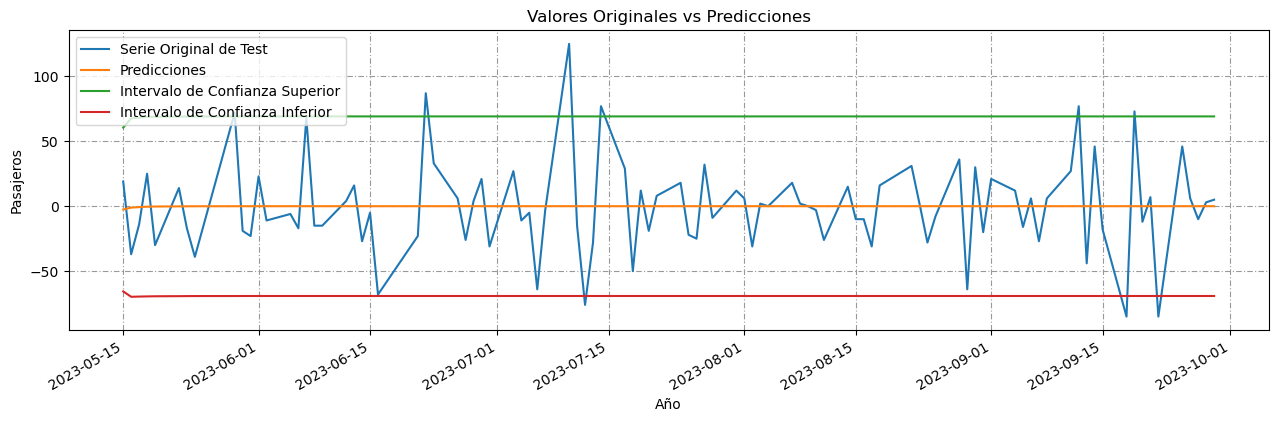

In [193]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_TP, TP_pred, TP_int)


In [194]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
   

In [195]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TP[:95]), predicciones_sarima_TP.predicted_mean)


MSE: 1279.631271476309
MAE: 26.357223835882493
RMSE: 35.7719341310518


In [196]:
serie_TP = predicciones_sarima_TP.predicted_mean.shift(lag)

NameError: name 'lag' is not defined

**TAD**

In [197]:
modelo_sarima_TAD = SARIMAX(train_TAD, order=(1,0,1), seasonal_order=(0,0,0,7))
result_sarima_TAD = modelo_sarima_TAD.fit()
print(result_sarima_TAD.summary())

                               SARIMAX Results                                
Dep. Variable:                    TAD   No. Observations:                  284
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1055.745
Date:                Sat, 11 Nov 2023   AIC                           2117.490
Time:                        20:03:37   BIC                           2128.437
Sample:                             0   HQIC                          2121.879
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0817      0.067      1.223      0.221      -0.049       0.213
ma.L1         -0.9636      0.019    -50.912      0.000      -1.001      -0.926
sigma2        98.3183      6.429     15.293      0.0

In [198]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_TAD = result_sarima_TAD.get_forecast(len(test_TAD))


In [199]:
predicciones_TAD = result_sarima_TAD.get_forecast(10)

In [200]:
TAD_pred = predicciones_sarima_TAD.predicted_mean
TAD_int = predicciones_sarima_TAD.conf_int()


In [201]:
TAD_pred.index = test_TAD.index
TAD_int.index = test_TAD.index


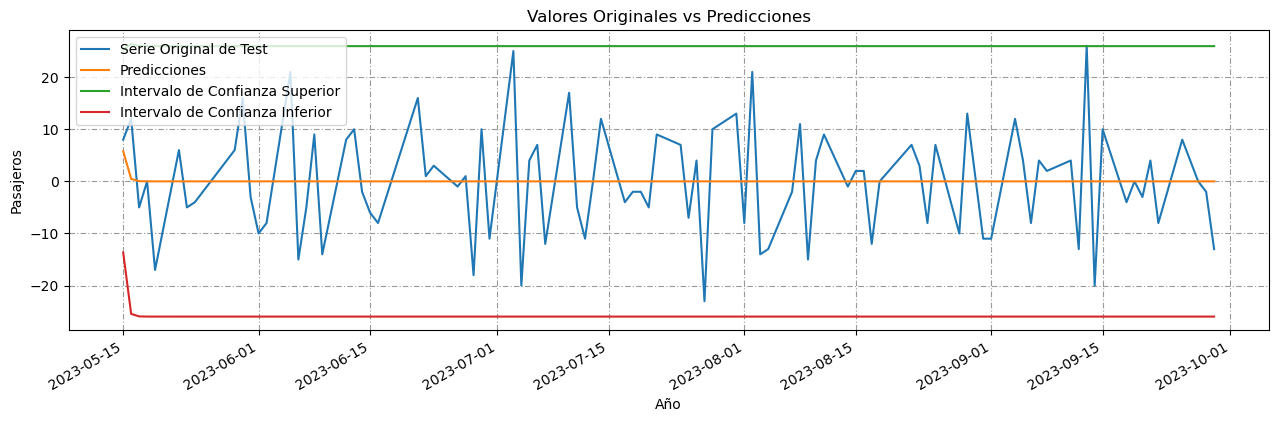

In [202]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_TAD, TAD_pred, TAD_int)


In [203]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    


In [204]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_TAD[:95]), predicciones_sarima_TAD.predicted_mean)


MSE: 105.412165934983
MAE: 8.271369847756617
RMSE: 10.267042706397154


In [205]:
serie_TAD = predicciones_sarima_TAD.predicted_mean.shift(lag)

NameError: name 'lag' is not defined

**PP**

In [206]:
modelo_sarima_PP = SARIMAX(train_PP, order=(1,0,1), seasonal_order=(0,0,0,7))
result_sarima_PP = modelo_sarima_PP.fit()
print(result_sarima_PP.summary())

                               SARIMAX Results                                
Dep. Variable:                     PP   No. Observations:                  284
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1229.413
Date:                Sat, 11 Nov 2023   AIC                           2464.825
Time:                        20:03:59   BIC                           2475.772
Sample:                             0   HQIC                          2469.214
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5816      0.039     14.869      0.000       0.505       0.658
ma.L1         -0.9686      0.021    -46.763      0.000      -1.009      -0.928
sigma2       335.1362      8.871     37.777      0.0

In [207]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 95 días del test
predicciones_sarima_PP = result_sarima_PP.get_forecast(len(test_PP))


In [208]:
predicciones_PP = result_sarima_PP.get_forecast(10)

In [209]:
PP_pred = predicciones_sarima_PP.predicted_mean
PP_int = predicciones_sarima_PP.conf_int()


In [210]:
PP_pred.index = test_PP.index
PP_int.index = test_PP.index


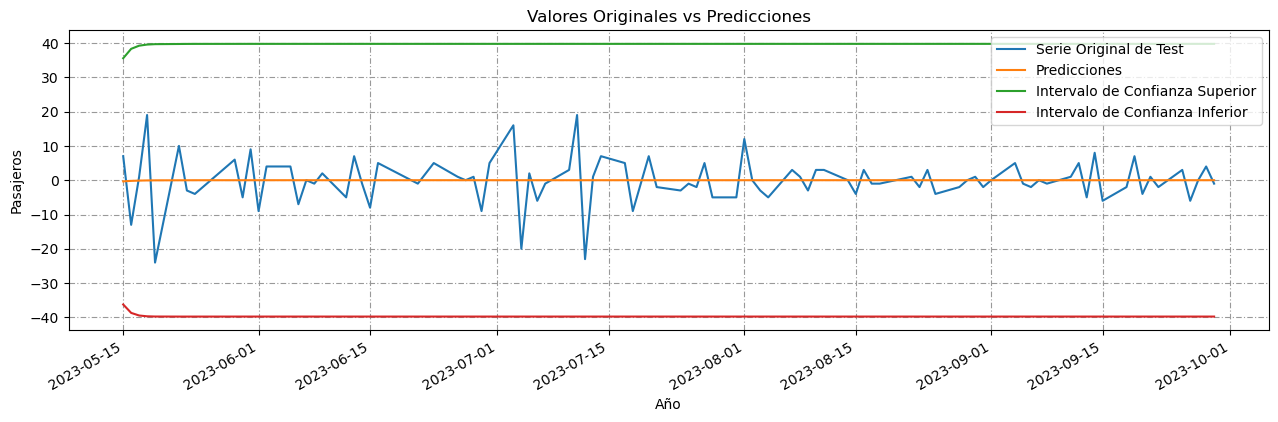

In [211]:
# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test_PP, PP_pred, PP_int)


In [212]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
   


In [213]:
#Evaluamos las métricas del modelo
evaluar_metricas((test_PP[:95]), predicciones_sarima_PP.predicted_mean)


MSE: 46.17912003062302
MAE: 4.655594921223892
RMSE: 6.795522057253807


In [459]:
serie_PP = predicciones_sarima_PP.predicted_mean.shift(lag)

In [ ]:
datos = {'Modelos': ['WAPP','WAPP1','WAPP2'],
         'AIC': [result_sarima_WAPP.aic, result_sarima_WAPP1.aic, result_sarima_WAPP2.aic ],
         'BIC': [result_sarima_WAPP.bic, result_sarima_WAPP1.bic, result_sarima_WAPP2.bic],
         'MAE': [result_sarima_WAPP.mse, result_sarima_WAPP1.mse, result_sarima_WAPP2.mse],
         'MSE': [result_sarima_WAPP.mae, result_sarima_WAPP1.mae, result_sarima_WAPP2.mae],
         'RMSE': [result_sarima_WAPP.rmse, modelo_sarima_WAPP1.rmse, modelo_sarima_WAPP2.rmse]}


modelos_residuos = pd.DataFrame(datos)
modelos_residuos

AttributeError: 'SARIMAXResults' object has no attribute 'rmse'

---
### **10. Construir un modelo de Vectores Autorregresivos (VAR) con las series elegidas para realizar predicciones sobre cada una de ellas.**

In [460]:
serieVAR=pd.concat([data_diff_WAPP, data_diff_TP, data_diff_TAD, data_diff_PP], axis=1)

In [461]:
serieVAR.head()

WAPP    TP   TAD   PP
FECHA                            
2022-03-16  -7.0  -8.0 -27.0  3.0
2022-03-17   2.0  -4.0  15.0  2.0
2022-03-18  53.0 -16.0 -21.0 -5.0
2022-03-21 -22.0  15.0  24.0 -1.0
2022-03-22 -13.0  -1.0 -10.0  5.0

In [462]:
serieVAR.tail()

WAPP    TP   TAD   PP
FECHA                            
2023-09-25   6.0  46.0   8.0  3.0
2023-09-26  -7.0   6.0   4.0 -6.0
2023-09-27   4.0 -10.0   0.0  0.0
2023-09-28   9.0   3.0  -2.0  4.0
2023-09-29 -14.0   5.0 -13.0 -1.0

In [463]:
# Separacion Train/Test

# Variable que guarda el porcentaje de train
split = .75

# Seleccion de train
train = serieVAR.iloc[:round(len(serieVAR)*split)]

# Seleccionamos de test
test = serieVAR.iloc[round(len(serieVAR)*split):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train,"\n\n", test)

            WAPP    TP   TAD   PP
FECHA                            
2022-03-16  -7.0  -8.0 -27.0  3.0
2022-03-17   2.0  -4.0  15.0  2.0
2022-03-18  53.0 -16.0 -21.0 -5.0
2022-03-21 -22.0  15.0  24.0 -1.0
2022-03-22 -13.0  -1.0 -10.0  5.0
...          ...   ...   ...  ...
2023-05-08  -6.0   7.0   4.0  2.0
2023-05-09  -5.0  21.0  -5.0 -6.0
2023-05-10   5.0 -47.0  -9.0 -1.0
2023-05-11 -12.0  37.0  13.0  3.0
2023-05-12   2.0   0.0  -9.0  3.0

[284 rows x 4 columns] 

             WAPP    TP   TAD    PP
FECHA                             
2023-05-15   6.0  19.0   8.0   7.0
2023-05-16  -5.0 -37.0  12.0 -13.0
2023-05-17  -2.0 -14.0  -5.0   1.0
2023-05-18   0.0  25.0   0.0  19.0
2023-05-19  -2.0 -30.0 -17.0 -24.0
...          ...   ...   ...   ...
2023-09-25   6.0  46.0   8.0   3.0
2023-09-26  -7.0   6.0   4.0  -6.0
2023-09-27   4.0 -10.0   0.0   0.0
2023-09-28   9.0   3.0  -2.0   4.0
2023-09-29 -14.0   5.0 -13.0  -1.0

[95 rows x 4 columns]


In [464]:
train

WAPP    TP   TAD   PP
FECHA                            
2022-03-16  -7.0  -8.0 -27.0  3.0
2022-03-17   2.0  -4.0  15.0  2.0
2022-03-18  53.0 -16.0 -21.0 -5.0
2022-03-21 -22.0  15.0  24.0 -1.0
2022-03-22 -13.0  -1.0 -10.0  5.0
...          ...   ...   ...  ...
2023-05-08  -6.0   7.0   4.0  2.0
2023-05-09  -5.0  21.0  -5.0 -6.0
2023-05-10   5.0 -47.0  -9.0 -1.0
2023-05-11 -12.0  37.0  13.0  3.0
2023-05-12   2.0   0.0  -9.0  3.0

[284 rows x 4 columns]

In [465]:
test

WAPP    TP   TAD    PP
FECHA                             
2023-05-15   6.0  19.0   8.0   7.0
2023-05-16  -5.0 -37.0  12.0 -13.0
2023-05-17  -2.0 -14.0  -5.0   1.0
2023-05-18   0.0  25.0   0.0  19.0
2023-05-19  -2.0 -30.0 -17.0 -24.0
...          ...   ...   ...   ...
2023-09-25   6.0  46.0   8.0   3.0
2023-09-26  -7.0   6.0   4.0  -6.0
2023-09-27   4.0 -10.0   0.0   0.0
2023-09-28   9.0   3.0  -2.0   4.0
2023-09-29 -14.0   5.0 -13.0  -1.0

[95 rows x 4 columns]

**Criterio de Granger**

In [466]:
from statsmodels.tsa.stattools import grangercausalitytests

In [467]:
# P-valores menores al nivel de significancia (0.05) implica que la hipotesis nula (X no causa Y) puede rechazarse.
# testgr: Es el tipo de prueba que se utilizará para evaluar la causalidad de Granger. Por defecto, se utiliza 'ssr_chi2test', que es una prueba basada en chi-cuadrado,

def grangers_causation_matrix(data, variables, maxlag, testgr='ssr_chi2test', verbose=False):


    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [(test_result[i+1][0][testgr][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

# se agrega '_x' al final de los nombres de las columnas para indicar que son las variables "causantes" y '_y' al final de los nombres de las filas para indicar que son las variables "afectadas".

In [468]:
testgr = 'ssr_chi2test'
grangers_causation_matrix(train, variables = train.columns, maxlag=10)

WAPP_x          TP_x     TAD_x          PP_x
WAPP_y  1.000000  1.761922e-10  0.008664  5.905575e-07
TP_y    0.148711  1.000000e+00  0.258131  8.678813e-04
TAD_y   0.161726  1.941150e-01  1.000000  5.885956e-04
PP_y    0.058835  1.264096e-07  0.035532  1.000000e+00

In [469]:
from statsmodels.tsa.api import VAR

In [470]:
model = VAR(train)

In [471]:
x = model.select_order(maxlags=36)
x.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [472]:
model_fitted = model.fit(2)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 11, Nov, 2023
Time:                     18:23:57
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    22.9087
Nobs:                     282.000    HQIC:                   22.6302
Log likelihood:          -4729.14    FPE:                5.58791e+09
AIC:                      22.4438    Det(Omega_mle):     4.92804e+09
--------------------------------------------------------------------
Results for equation WAPP
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          -0.010524         0.757957           -0.014           0.989
L1.WAPP        -0.422559         0.059768           -7.070           0.000
L1.TP           0.058832         0.026661            2.207           0.027
L1.TAD    

In [473]:
# Funcion que recibe listas con las predicciones e intervalos de confianza de las 4 series y devuelve un
# dataframe para la serie indicada por la variable indice
def serializar(predicciones_, test_, indice, futuro_, intervalos=True):

    serie = {
        "FECHA": test_.index[:futuro_],
        "serie"+str(indice): predicciones_[0][:,indice-1].tolist(),
        "serie"+str(indice)+"_inf": predicciones_[1][:,indice-1].tolist(),
        "serie"+str(indice)+"_sup": predicciones_[2][:,indice-1].tolist()}
    serie = pd.DataFrame(serie, columns=["FECHA", "serie"+str(indice),
                                         "serie"+str(indice)+"_inf", "serie"+str(indice)+"_sup"])
    serie.set_index("FECHA", inplace=True)
    if (intervalos==False):
        serie.loc[serie["serie"+str(indice)+"_inf"] < 0, "serie"+str(indice)+"_inf"] = 0
        serie.loc[serie["serie"+str(indice)+"_sup"] < 0, "serie"+str(indice)+"_sup"] = 0
    return serie

In [474]:
def graficar_pred(serie_test, serie_pred, titulo="Valores Originales vs Predicciones",
                  xlabel="Fecha", ylabel="Valor", intervalos=True):
    # serie_test:
    # serie_pred:

    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.iloc[:,0].plot(label="Predicciones")
    if (intervalos==True):
        serie_pred.iloc[:,2].plot(label="Intervalo de Confianza Superior")
        serie_pred.iloc[:,1].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.5', dashes=(5,2,1,2))

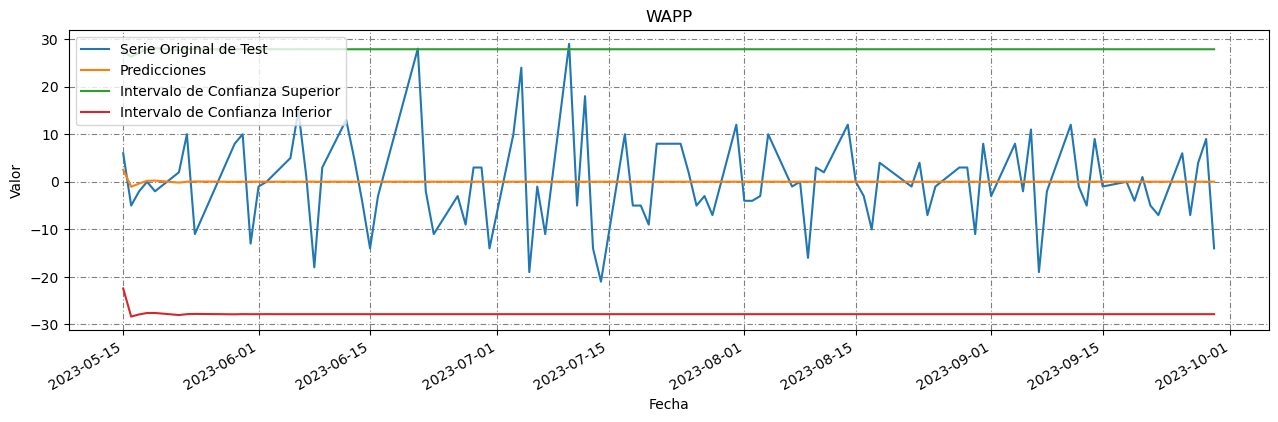

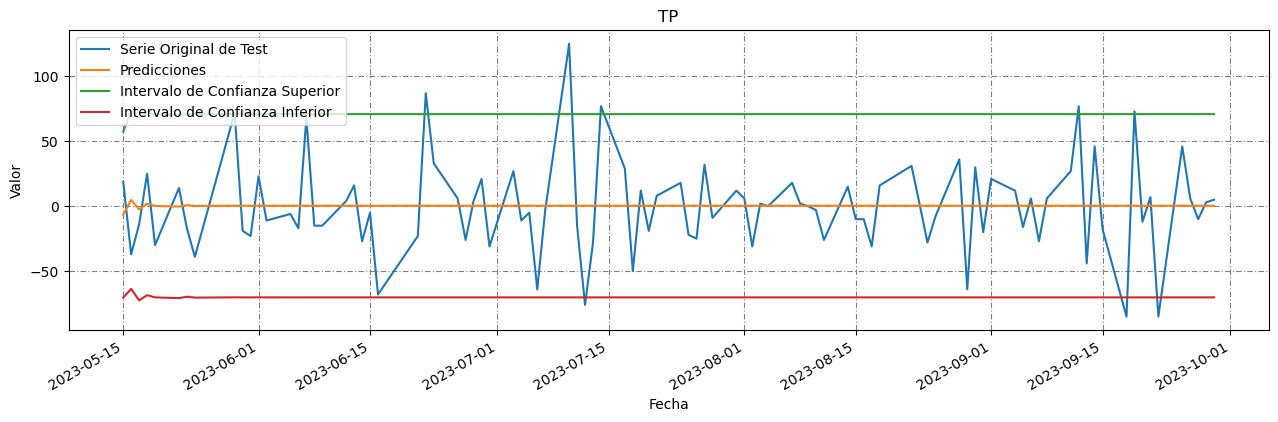

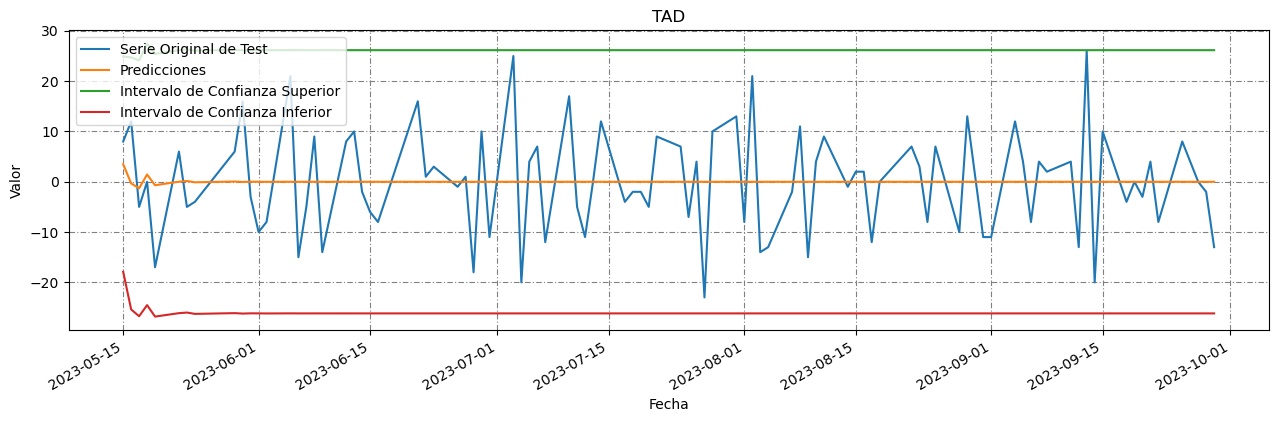

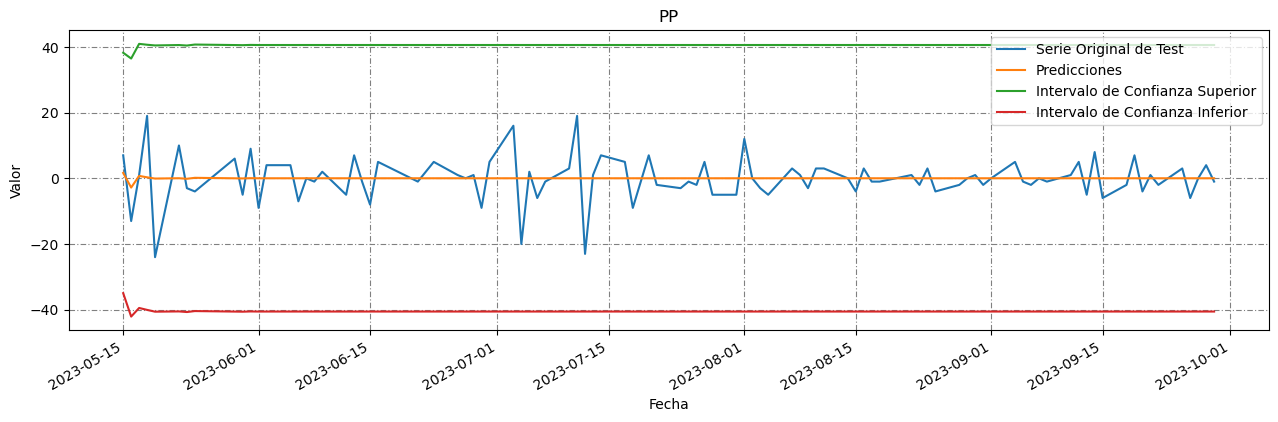

In [475]:
# Con la variable futuro se indican cuantas unidades en tiempo
# hacia adelante se quieren predecir
futuro = 95
lag_orden = 2

predicciones = model_fitted.forecast_interval(train.values[-lag_orden:], steps=futuro)

df = list()
for i in [1, 2, 3, 4]:
    df.append(serializar(predicciones, test, i, futuro))

for i, serie in enumerate(serieVAR):
    graficar_pred(test[serie][:futuro], df[i], titulo=serie)

**Análisis de Residuos**

In [476]:
def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [477]:
def test_residuos(residuos):


    # Test de Jarque Bera
    # H0: los datos estan distribuidos normalmente
    # Ha: los datos no estan distribuidos normalmente
    # Si p < 0.05 se rechaza la hipotesis nula
    jarquebera = jarque_bera(residuos)
    print('Jarque-Bera')
    print(f'p-valor: {jarquebera[1]}\n')

    # Test de Shapiro Wilks
    # H0: los datos estan distribuidos normalmente
    # Ha: los datos no estan distribuidos normalmente
    # Si p < 0.05 se rechaza la hipotesis nula
    shapir = shapiro(residuos)
    print('Shapiro')
    print(f'p-valor: {shapir[1]}\n')

In [478]:
def evaluar_residuos(residuos):
    residuos.plot(title='Residuos', figsize=(12, 3))
    plt.axhline(0, linestyle='--', color='k')
    plt.show()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
    ax[0].set_title('Residuos KDE')
    ax[1].set_title('Q-Q Plot')
    residuos.plot(kind='kde', ax=ax[0])
    probplot(residuos, dist='norm', plot=ax[1])
    plt.show()
    acf = plot_acf(residuos)
    acf.set_size_inches(12,3)
    plt.show()
    print('Descriptivo Residuos\n')
    print(f'{residuos.describe()}\n\n')
    print('Test sobre los Residuos\n')
    test_residuos(residuos)

In [479]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import jarque_bera, shapiro, boxcox, probplot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_breusch_godfrey

In [480]:
futuro

95

**WAPP**

MSE: 45.69630186557246
MAE: 4.624485280598219
RMSE: 6.759903983458083
MAPE: inf
Evaluacion de residuos de Serie 


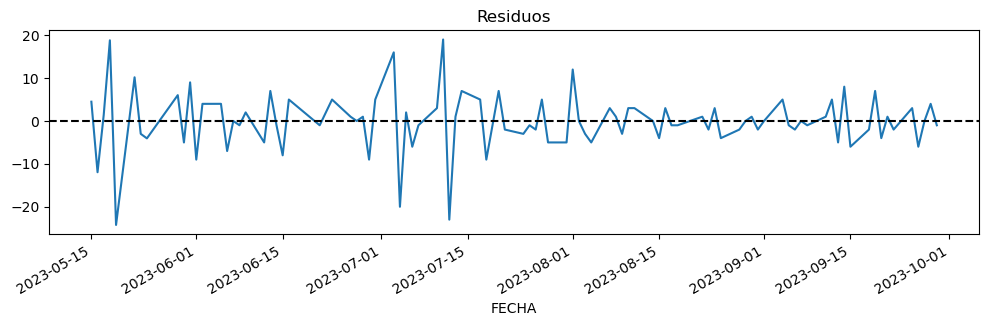

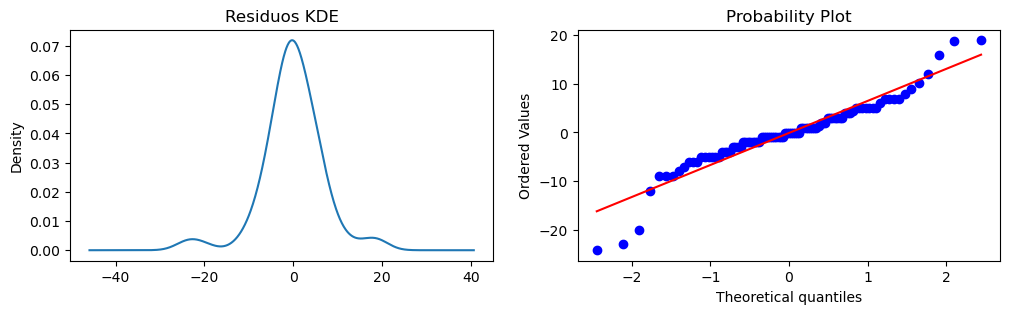

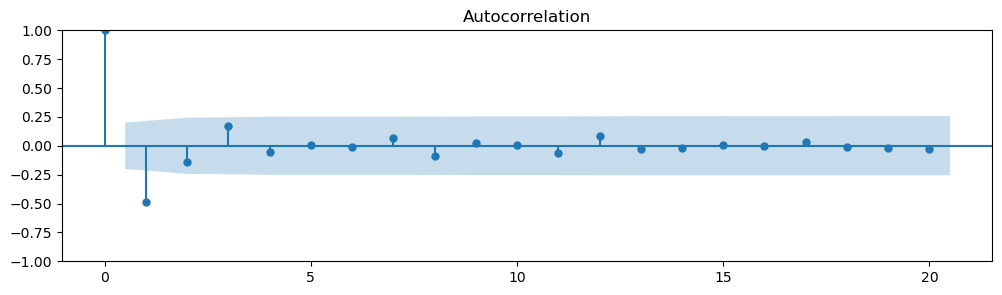

Descriptivo Residuos

count    95.000000
mean     -0.113087
std       6.794815
min     -24.252446
25%      -3.014903
50%      -0.014903
75%       2.985097
max      18.985097
dtype: float64


Test sobre los Residuos

Jarque-Bera
p-valor: 4.819343666764439e-10

Shapiro
p-valor: 3.028518403880298e-05



In [481]:
evaluar_metricas(test[serie][:futuro], df[0].iloc[:,0])
print(f"Evaluacion de residuos de Serie ")
evaluar_residuos(test[serie][:futuro]-df[0].iloc[:,0])

**TP**

MSE: 48.92609998603183
MAE: 4.834473509651159
RMSE: 6.994719435833852
MAPE: inf
Evaluacion de residuos de Serie 


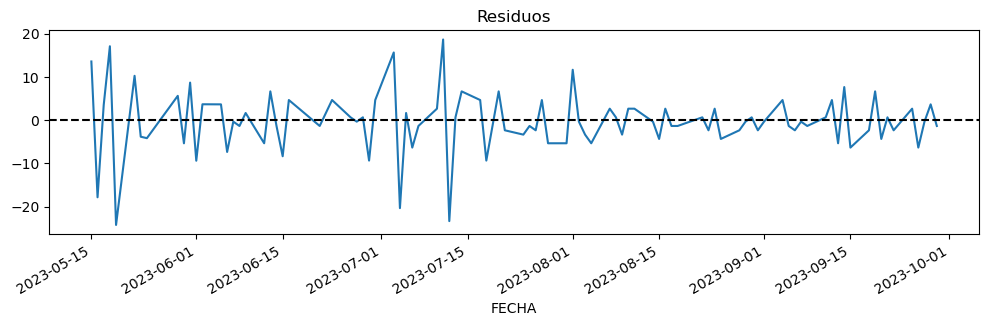

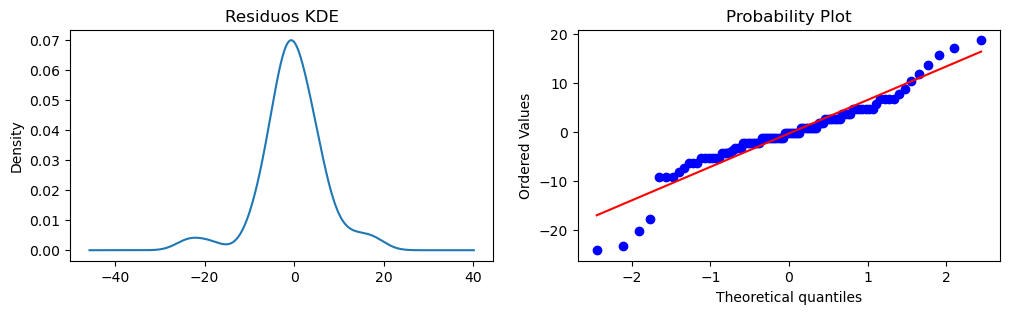

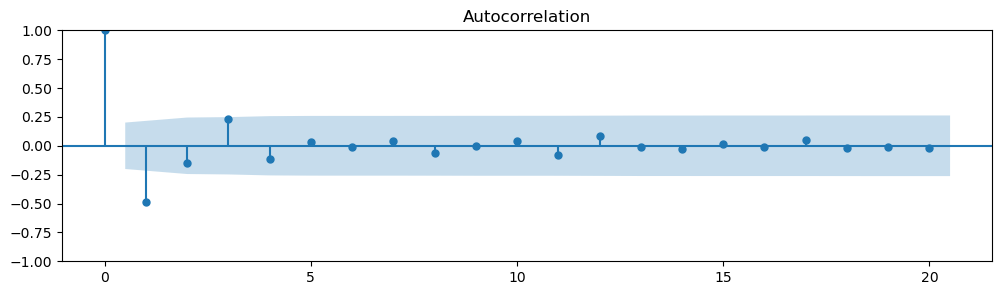

Descriptivo Residuos

count    95.000000
mean     -0.379321
std       7.021480
min     -24.228733
25%      -3.338134
50%      -0.338134
75%       3.088850
max      18.661866
dtype: float64


Test sobre los Residuos

Jarque-Bera
p-valor: 8.748938507972904e-08

Shapiro
p-valor: 4.9988706450676546e-05



In [482]:
evaluar_metricas(test[serie][:futuro], df[1].iloc[:,0])
print(f"Evaluacion de residuos de Serie ")
evaluar_residuos(test[serie][:futuro]-df[1].iloc[:,0])

**TAD**

MSE: 44.82659882546682
MAE: 4.603464292532537
RMSE: 6.69526689725412
MAPE: inf
Evaluacion de residuos de Serie 


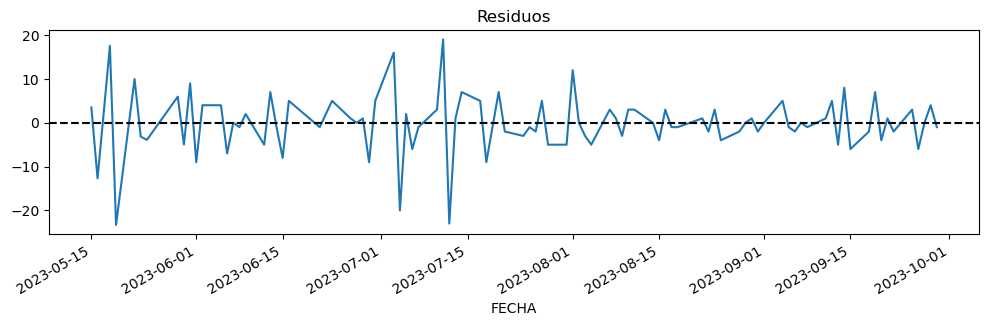

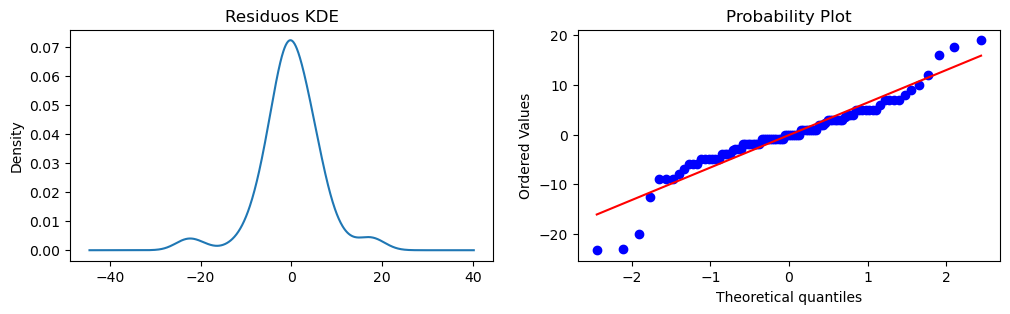

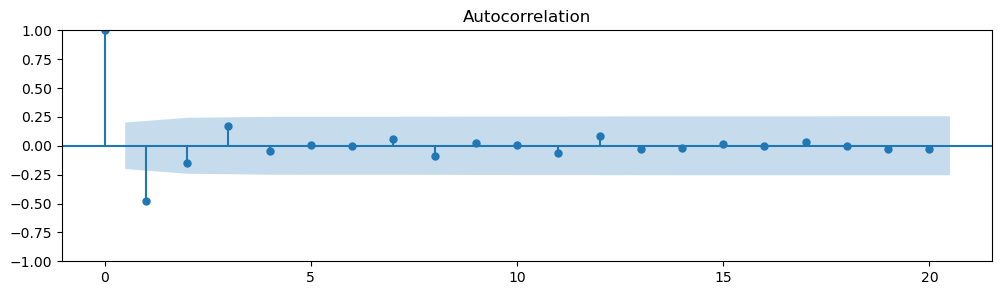

Descriptivo Residuos

count    95.000000
mean     -0.106614
std       6.729932
min     -23.307540
25%      -2.993449
50%       0.006551
75%       3.006551
max      19.006551
dtype: float64


Test sobre los Residuos

Jarque-Bera
p-valor: 3.044139409482718e-09

Shapiro
p-valor: 4.525636904872954e-05



In [483]:
evaluar_metricas(test[serie][:futuro], df[2].iloc[:,0])
print(f"Evaluacion de residuos de Serie ")
evaluar_residuos(test[serie][:futuro]-df[2].iloc[:,0])

**PP**

MSE: 45.091304224526986
MAE: 4.594793781489905
RMSE: 6.715005899068666
MAPE: inf
Evaluacion de residuos de Serie 


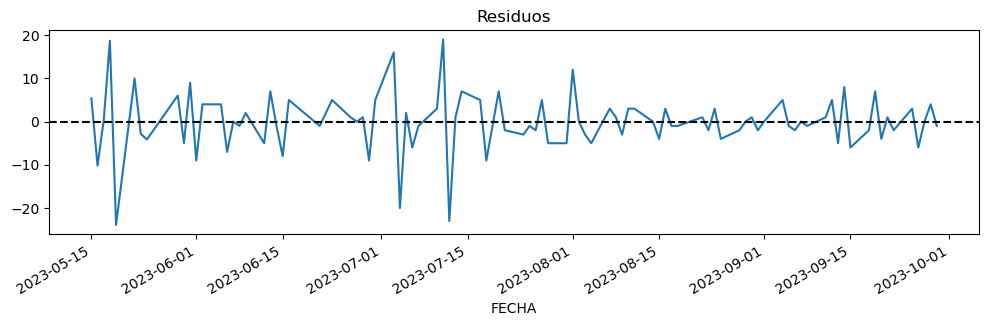

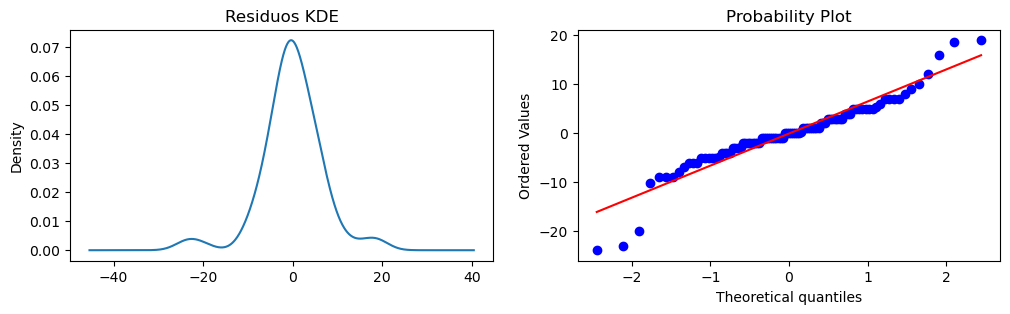

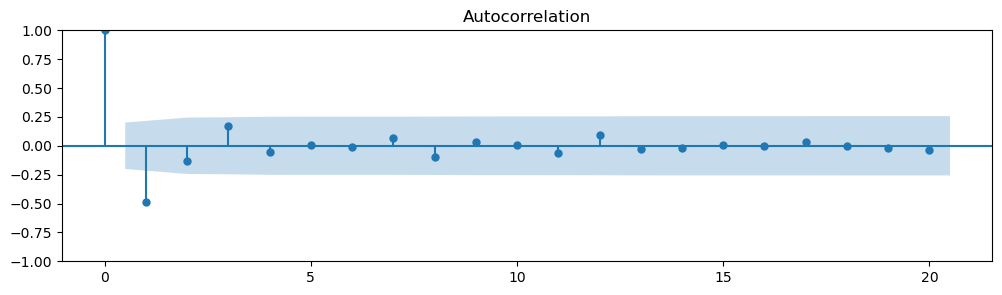

Descriptivo Residuos

count    95.000000
mean     -0.093855
std       6.749970
min     -23.926474
25%      -3.013009
50%      -0.013009
75%       2.986991
max      18.986991
dtype: float64


Test sobre los Residuos

Jarque-Bera
p-valor: 4.899249493093182e-10

Shapiro
p-valor: 2.9358008760027587e-05



In [484]:
evaluar_metricas(test[serie][:futuro], df[3].iloc[:,0])
print(f"Evaluacion de residuos de Serie ")
evaluar_residuos(test[serie][:futuro]-df[3].iloc[:,0])

---
### **11. Analizar la función impulso respuesta y realizar distintas pruebas para analizar la causalidad. Justificar la elección del modelo con todo lo visto en clase. Es posible complementar con otros análisis.**

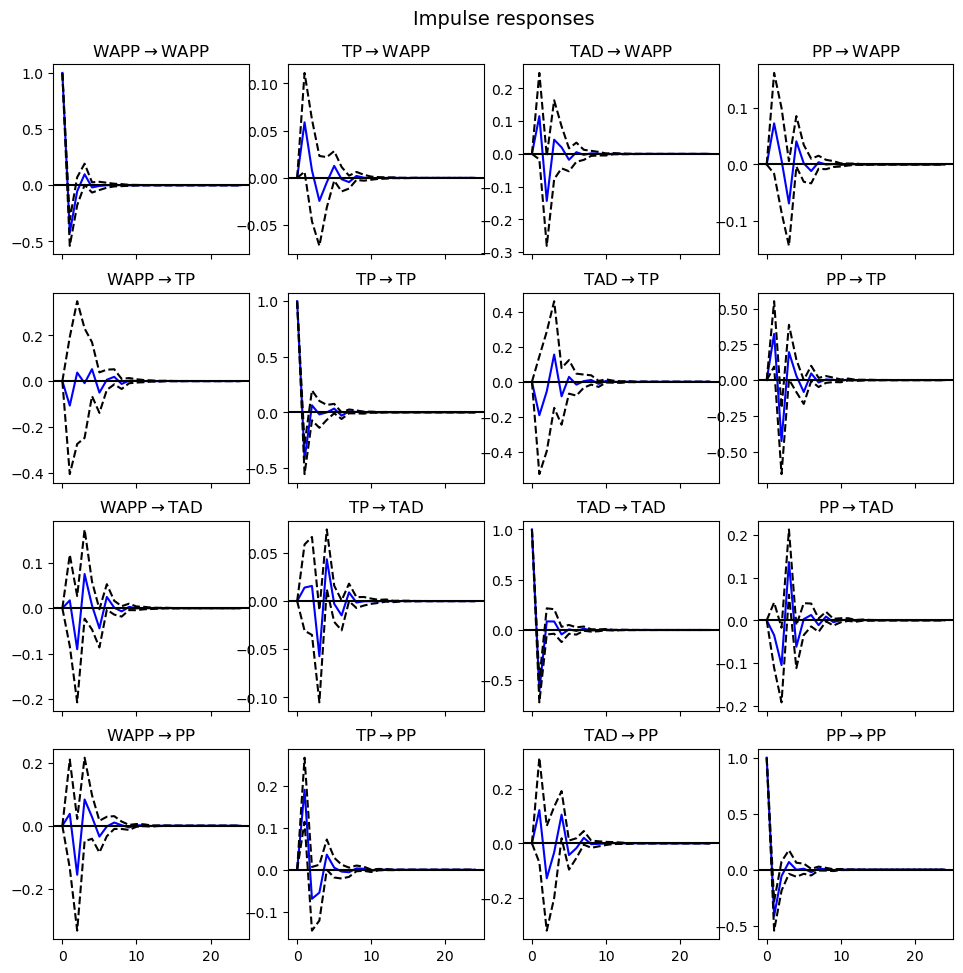

In [485]:
model_fitted.irf(24).plot();

In [486]:
# Suponiendo que fevd es tu objeto IRAnalysis
cumulative_irf = fevd.cum_effects

# Luego puedes imprimir o hacer lo que necesites con cumulative_irf
print(cumulative_irf)


[[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

 [[ 4.29922987e-01  9.13465446e-02  1.08307295e-01  6.09349588e-02]
  [-1.56228821e-02  5.29167371e-01 -3.21180255e-01  2.98204981e-01]
  [ 3.00995361e-02  2.24874835e-03  2.72351165e-01 -3.62683213e-02]
  [ 8.72852923e-02  2.09643870e-01  2.59547655e-03  4.87509840e-01]]

 [[ 3.46181469e-01  9.10816503e-02 -1.04718820e-01  7.69497937e-02]
  [ 7.72927972e-02  5.90908611e-01 -5.22357799e-01 -1.71749307e-01]
  [-2.47965853e-02  2.59899735e-02  2.80556449e-01 -1.30523944e-01]
  [-6.66263278e-02  1.84815431e-01 -1.88405298e-01  3.33190393e-01]]

 [[ 3.21778088e-01  1.01182416e-01 -1.79430437e-01  6.91778815e-02]
  [-3.89463911e-02  5.32175985e-01 -2.27109336e-01 -1.48014661e-01]
  [ 7.44788169e-02 -2.98948301e-02  2.8350

In [489]:
fevd = model_fitted.irf(24)

In [490]:
fevd.summary()

AttributeError: 'IRAnalysis' object has no attribute 'summary'

**Forecast**

In [ ]:
results = model_fitted

In [494]:
# Get the lag order
lag_order = 2
print(lag_order)

# Input data for forecasting
forecast_input = train.values[-lag_order:]
forecast_input

TypeError: bad operand type for unary -: 'VARResultsWrapper'

In [ ]:
# Forecast
n_forecast = 12
fc = results.forecast(y=forecast_input, steps=n_forecast)
df_forecast = pd.DataFrame(fc, index=precios.index[-n_forecast:], columns=precios.columns + '_1d')
df_forecast

In [ ]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = train_df.columns
    for col in columns:
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (train_df[col].iloc[-1]-train_df[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = train_df[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [ ]:
df_results = invert_transformation(train_df, df_forecast, second_diff=False)
df_results.loc[:, ['STYRENE FOB ARA US$-TON_forecast', 'BENCENO SPOT USGC US$-TON_forecast', 'CRUDE_OIL_WTI_forecast']]

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, dpi=100, figsize=(14,5))
for i, (col,ax) in enumerate(zip(precios.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    test_df[col][-n_forecast:].plot(legend=True, ax=ax);
    ax.set_title(col)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    #ax.tick_params(labelsize=6, direction= 'out')
    ax.legend(fontsize="8",loc='upper center')
plt.show();

**Evaluar los pronósticos**

In [ ]:
rmse_estireno=math.sqrt(mean_squared_error(df_results['STYRENE FOB ARA US$-TON_forecast'],test_df['STYRENE FOB ARA US$-TON']))
print('Mean value of Estireno is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['STYRENE FOB ARA US$-TON']),rmse_estireno))

rmse_benceno=math.sqrt(mean_squared_error(df_results['BENCENO SPOT USGC US$-TON_forecast'],test_df['BENCENO SPOT USGC US$-TON']))
print('Mean value of Benceno is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['BENCENO SPOT USGC US$-TON']),rmse_benceno))

rmse_petroleo=math.sqrt(mean_squared_error(df_results['CRUDE_OIL_WTI_forecast'],test_df['CRUDE_OIL_WTI']))
print('Mean value of Petroleo is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['CRUDE_OIL_WTI']),rmse_petroleo))

---
### **12. En caso de presentar estacionalidad alguna de las series elegidas, se solicita determinar la representación más adecuada mediante algún modelo SARIMA y comparar los resultados con los modelos determinados en el trabajo anterior. (Opcional) Realizar la prueba de hipótesis de HEGY para testear la conjetura de raíz unitaria sobre las series elegidas.**

In [ ]:
# Las series no presentan estacionalidad